<a href="https://colab.research.google.com/github/Navneet2409/credit-card-default-prediction/blob/main/Credit_Card_Notebook_Navneet_Keshri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Credit Card Default Prediction**



##### **Project Type**    - Classification
##### **Contribution**    - Individual


## **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**

Despite high returns, credit cards carry significant risks. The ever-expanding number of credit cards has achieved an expansion in how much credit card defaults and the subsequent enormous measure of bills and repayment data information have likewise carried specific hardships to the risk controllers. As a result, one of the primary concerns of banks is how to use the data generated by users and extract useful information to control risks, reduce the default rate, and control the growth of non-performing assets.

A credit card issuer based in Taiwan wants to learn more about how likely its customers are to default on their payments and the main factors that influence this probability. The issuer's decisions regarding who to issue a credit card to and what credit limit to offer would be informed by this information. The issuer's future strategy, including plans to offer targeted credit products to their customers, would be informed by a better understanding of their current and potential customers as a result of this.

**Our objective**
* To determine the main factors that influence the likelihood of defaulting on a credit card.
* To determine the likelihood that Bank customers will default on their credit card payments.


## ***Let's Begin !***

## ***1. Know Your Data***

#### Import Libraries

Need to check it again

In [1]:
# Import Libraries and modules
import pandas as pd
pd.set_option('display.max_columns', 50)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier

from sklearn.ensemble import StackingClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, accuracy_score, roc_auc_score, roc_curve, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

#### Dataset Loading

In [2]:
# let's mount the google drive first
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# load the Default of Credit Card Clients data set from the drive
clients_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project Docs/Credit Card Default Prediction - Navneet Keshri/default of credit card clients.csv',header = 1)

#### Dataset First View

In [4]:
# Viewing the top 5 rows to take a glimpse of the data
clients_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


#### Dataset Rows & Columns Count

In [5]:
# Dataset Rows & Columns 
clients_df.shape

(30000, 25)

#### Dataset Information

In [6]:
# Dataset Info
clients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

We have 25 columns. All of them are numerical (int64 data type)

#### Duplicate Values

What is the significance of eliminating duplicate records from my data?

The mere presence of repeated data in the dataset is referred to as "duplication." This could be caused by incorrect data entry or data collection procedures. We can save time and money by not sending the same data to the machine learning model multiple times by removing duplicate data from our set.

In [7]:
# Checking Duplicate Values
value=len(clients_df[clients_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


After counting duplicate values in the above data, we discovered that none is present.

#### Missing Values/Null Values

Why is it necessary to deal with missing values

There are frequently a lot of missing values in the actual data. Data corruption or failure to record data are potential causes of missing values. During the preprocessing of the dataset, the handling of missing data is very important because many machine learning algorithms do not support missing values. Because of this, we first check for missing values.

In [8]:
# Missing Values/Null Values Count
print(clients_df.isnull().sum())

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


From the above commands, we noticed that every column has 0 number of rows null values. This seems to be clean data and there is no missing data in any of the 'rows and columns'.

#### What did you know about your dataset?

The dataset given is a dataset from Banking industry, and we have to analysis the credit default of customers and the insights behind it.

Predicting customer loan default is a job of proactively identifying customers most likely to default on loan payments. Typically, this is accomplished by dynamically analyzing relevant customer data and actions.

In the dataset we have 30000 number of rows and 25 columns. There are no mising values and duplicate values in the dataset.




## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
clients_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [10]:
# Dataset Describe
clients_df.describe(include='all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


####  Variables Description

In [11]:
clients_df.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


* **ID	:** ID of each client
* **LIMIT_BAL	:** Amount of given credit in NT dollars 
* **SEX	:** Gender (1=male, 2=female)
* **EDUCATION	:** (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* **MARRIAGE	:** Marital status (1=married, 2=single, 3=others)
* **AGE	:** Age in years
* **PAY_0	:** Repayment status in September, 2005 (-2=no consumption, -1=pay duly, 0=the use of revolving credit, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
* **PAY_2	:** Repayment status in August, 2005 (scale same as above)
* **PAY_3	:** Repayment status in July, 2005 (scale same as above)
* **PAY_4	:** Repayment status in June, 2005 (scale same as above)
* **PAY_5	:** Repayment status in May, 2005 (scale same as above)
* **PAY_6	:** Repayment status in April, 2005 (scale same as above)
* **BILL_AMT1	:** Amount of bill statement in September, 2005 (NT dollar)
* **BILL_AMT2	:** Amount of bill statement in August, 2005 (NT dollar)
* **BILL_AMT3	:** Amount of bill statement in July, 2005 (NT dollar)
* **BILL_AMT4	:** Amount of bill statement in June, 2005 (NT dollar)
* **BILL_AMT5	:** Amount of bill statement in May, 2005 (NT dollar)
* **BILL_AMT6	:** Amount of bill statement in April, 2005 (NT dollar)
* **PAY_AMT1	:** Amount of previous payment in September, 2005 (NT dollar)
* **PAY_AMT2	:** Amount of previous payment in August, 2005 (NT dollar)
* **PAY_AMT3	:** Amount of previous payment in July, 2005 (NT dollar)
* **PAY_AMT4	:** Amount of previous payment in June, 2005 (NT dollar)
* **PAY_AMT5	:** Amount of previous payment in May, 2005 (NT dollar)
* **PAY_AMT6	:** Amount of previous payment in April, 2005 (NT dollar)
* **default.payment.next.month	:** Default payment (1=yes, 0=no)

#### Check Unique Values for each variable.

In [12]:
# print the unique value
clients_df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [13]:
# Check Unique Values for each variable.
for i in clients_df.columns.tolist():
  print("No. of unique values in ",i,"is",clients_df[i].nunique())

No. of unique values in  ID is 30000
No. of unique values in  LIMIT_BAL is 81
No. of unique values in  SEX is 2
No. of unique values in  EDUCATION is 7
No. of unique values in  MARRIAGE is 4
No. of unique values in  AGE is 56
No. of unique values in  PAY_0 is 11
No. of unique values in  PAY_2 is 11
No. of unique values in  PAY_3 is 11
No. of unique values in  PAY_4 is 11
No. of unique values in  PAY_5 is 10
No. of unique values in  PAY_6 is 10
No. of unique values in  BILL_AMT1 is 22723
No. of unique values in  BILL_AMT2 is 22346
No. of unique values in  BILL_AMT3 is 22026
No. of unique values in  BILL_AMT4 is 21548
No. of unique values in  BILL_AMT5 is 21010
No. of unique values in  BILL_AMT6 is 20604
No. of unique values in  PAY_AMT1 is 7943
No. of unique values in  PAY_AMT2 is 7899
No. of unique values in  PAY_AMT3 is 7518
No. of unique values in  PAY_AMT4 is 6937
No. of unique values in  PAY_AMT5 is 6897
No. of unique values in  PAY_AMT6 is 6939
No. of unique values in  default pay

##***3. Data Wrangling***

#### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.
# Create a copy of the current dataset and assigning to df
df = clients_df.copy()

#### Renaming some columns 

In [15]:
# Changing inconsistent column names "PAY_0" to 'PAY_1', 'default.payment.next.month'to 'DP_NEXT_MONTH'
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'DP_NEXT_MONTH'},inplace = True)
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DP_NEXT_MONTH'],
      dtype='object')

#### Categorical data conversion

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   ID             30000 non-null  int64
 1   LIMIT_BAL      30000 non-null  int64
 2   SEX            30000 non-null  int64
 3   EDUCATION      30000 non-null  int64
 4   MARRIAGE       30000 non-null  int64
 5   AGE            30000 non-null  int64
 6   PAY_1          30000 non-null  int64
 7   PAY_2          30000 non-null  int64
 8   PAY_3          30000 non-null  int64
 9   PAY_4          30000 non-null  int64
 10  PAY_5          30000 non-null  int64
 11  PAY_6          30000 non-null  int64
 12  BILL_AMT1      30000 non-null  int64
 13  BILL_AMT2      30000 non-null  int64
 14  BILL_AMT3      30000 non-null  int64
 15  BILL_AMT4      30000 non-null  int64
 16  BILL_AMT5      30000 non-null  int64
 17  BILL_AMT6      30000 non-null  int64
 18  PAY_AMT1       30000 non-null  int64
 19  PAY_

Although they appear to be of the integer type, 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'SEX', 'EDUCATION', 'MARRIAGE' and 'DP_NEXT_MONTH' columns are actually of the category type. As a result, if we do not alter this data structure, we run the risk of being deceived by the values during subsequent analyses.

Age is a integer data type not a categorical data type,

In [17]:
# Change the int64 column into catagory column
cols=['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'DP_NEXT_MONTH']
for col in cols:
  df[col]= df[col].astype('category')

In [18]:
# let's check the result of data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   ID             30000 non-null  int64   
 1   LIMIT_BAL      30000 non-null  int64   
 2   SEX            30000 non-null  category
 3   EDUCATION      30000 non-null  category
 4   MARRIAGE       30000 non-null  category
 5   AGE            30000 non-null  int64   
 6   PAY_1          30000 non-null  category
 7   PAY_2          30000 non-null  category
 8   PAY_3          30000 non-null  category
 9   PAY_4          30000 non-null  category
 10  PAY_5          30000 non-null  category
 11  PAY_6          30000 non-null  category
 12  BILL_AMT1      30000 non-null  int64   
 13  BILL_AMT2      30000 non-null  int64   
 14  BILL_AMT3      30000 non-null  int64   
 15  BILL_AMT4      30000 non-null  int64   
 16  BILL_AMT5      30000 non-null  int64   
 17  BILL_AMT6      30000 non-null  

#### Checking our dependent variable

In [19]:
# 'DP_NEXT_MONTH' is the dependent variable.
# It is a binary variable, that should take only two values (Yes = 1, No = 0).

df['DP_NEXT_MONTH'].value_counts()

0    23364
1     6636
Name: DP_NEXT_MONTH, dtype: int64

Most of the data is 'DP_NEXT_MONTH' = 0 (do not default next month)

The column may need to be rebalanced.

#### Checking other categorical columns


In [20]:
# 1. 'SEX'
# Gender (1 = male; 2 = female)
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

No data wrangling is needed for column 'SEX'

In [21]:
# 2. 'EDUCATION'
# Education (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown).
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

'EDUCATION' column has 4 = others, 5= unknown, 6 =unknown and 0 = unknown value we need to group all unknow into 4 = Others

In [22]:
def reassign_value(x):
  accepted_values = [1,2,3,4]
  if x in accepted_values:
    output = x
  else:
    output = 4
  return output

In [23]:
df['EDUCATION'] = df['EDUCATION'].apply(reassign_value)
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

Now this seems good and 'EDUCATION' data has been wrangled.

In [24]:
# 3. 'MARRIAGE'
# Marital status (1 = married; 2 = single; 3 = divorce; 0=others).
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

This column does not need data wrangling

'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', and 'PAY_6' are described as follows: 

(-2=no consumption, -1=pay duly, 0=the use of revolving credit, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

In [25]:
# 4. 'PAY_1'
# (-2=no consumption, -1=pay duly, 0=the use of revolving credit, 1=payment delay for one month, 2=payment delay for two months, … 
# 8=payment delay for eight months, 9=payment delay for nine months and above)
df['PAY_1'].value_counts()

0     14737
-1     5686
1      3688
-2     2759
2      2667
3       322
4        76
5        26
8        19
6        11
7         9
Name: PAY_1, dtype: int64

No data wrangling is needed for 'PAY_1'.

In [26]:
# 5. 'PAY_2'
# (-2=no consumption, -1=pay duly, 0=the use of revolving credit, 1=payment delay for one month, 2=payment delay for two months, … 
# 8=payment delay for eight months, 9=payment delay for nine months and above)
df['PAY_2'].value_counts()

0     15730
-1     6050
2      3927
-2     3782
3       326
4        99
1        28
5        25
7        20
6        12
8         1
Name: PAY_2, dtype: int64

No data wrangling is needed for 'PAY_2'

In [27]:
# 6. 'PAY_3'
# (-2=no consumption, -1=pay duly, 0=the use of revolving credit, 1=payment delay for one month, 2=payment delay for two months, … 
# 8=payment delay for eight months, 9=payment delay for nine months and above)
df['PAY_3'].value_counts()

0     15764
-1     5938
-2     4085
2      3819
3       240
4        76
7        27
6        23
5        21
1         4
8         3
Name: PAY_3, dtype: int64

No data wrangling is needed for 'PAY_3'

In [28]:
# 7. 'PAY_4'
# (-2=no consumption, -1=pay duly, 0=the use of revolving credit, 1=payment delay for one month, 2=payment delay for two months, … 
# 8=payment delay for eight months, 9=payment delay for nine months and above)
df['PAY_4'].value_counts()

0     16455
-1     5687
-2     4348
2      3159
3       180
4        69
7        58
5        35
6         5
1         2
8         2
Name: PAY_4, dtype: int64

No data wrangling is needed for 'PAY_4'

In [29]:
# 8. 'PAY_5'
# (-2=no consumption, -1=pay duly, 0=the use of revolving credit, 1=payment delay for one month, 2=payment delay for two months, … 
# 8=payment delay for eight months, 9=payment delay for nine months and above)
df['PAY_5'].value_counts()

0     16947
-1     5539
-2     4546
2      2626
3       178
4        84
7        58
5        17
6         4
8         1
Name: PAY_5, dtype: int64

No data wrangling is needed for 'PAY_5'

In [30]:
# 9. 'PAY_6'
# (-2=no consumption, -1=pay duly, 0=the use of revolving credit, 1=payment delay for one month, 2=payment delay for two months, … 
# 8=payment delay for eight months, 9=payment delay for nine months and above)
df['PAY_6'].value_counts()

0     16286
-1     5740
-2     4895
2      2766
3       184
4        49
7        46
6        19
5        13
8         2
Name: PAY_6, dtype: int64

No data wrangling is needed for 'PAY_6'

#### Checking Numerical columns


Creating a function to understand numerical columns

In [31]:
def inspect_num_column(input_series=None):
  ''' Takes pandas series as input to inspect and give summary plot and summary statistics'''

  # Display boxplot and histogram/kde.
  f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 5) )
  sns.boxplot(x=input_series, ax=ax1)
  sns.distplot(input_series, ax=ax2)

  ax1.set_title(input_series.name)
  plt.show()

  # Print summary statistics.
  print('Min: \t\t\t {:,.0f}'.format(input_series.min()))
  print('Lower Quartile: \t {:,.0f}'.format(input_series.quantile([.25]).iloc[0]))
  print('median: \t\t {:,.0f}'.format(input_series.median()))
  print('mean: \t\t\t {:,.0f}'.format(input_series.mean()))
  print('Upper Quartile: \t {:,.0f}'.format(input_series.quantile([.75]).iloc[0]))                                    
  print('max: \t\t\t {:,.0f}'.format(input_series.max()))
  print('\n')
  print('Skew: \t\t\t {:,.2f}'.format(input_series.skew()))
  print('Kurtosis: \t\t {:,.2f}'.format(input_series.kurtosis()))

  return None

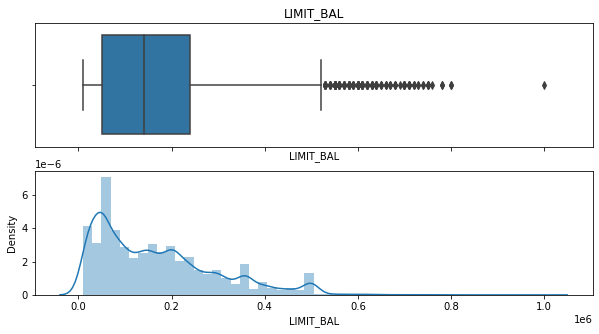

Min: 			 10,000
Lower Quartile: 	 50,000
median: 		 140,000
mean: 			 167,484
Upper Quartile: 	 240,000
max: 			 1,000,000


Skew: 			 0.99
Kurtosis: 		 0.54


In [32]:
# 1. 'LIMIT_BAL'
# Amount of the given credit (NT dollar)
input_series = df['LIMIT_BAL']
inspect_num_column(input_series)

The column may need to be rebalanced.

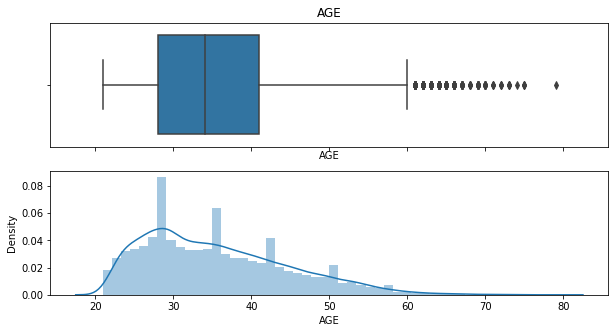

Min: 			 21
Lower Quartile: 	 28
median: 		 34
mean: 			 35
Upper Quartile: 	 41
max: 			 79


Skew: 			 0.73
Kurtosis: 		 0.04


In [33]:
# 2. 'AGE'
# Amount of the given credit (NT dollar)
input_series = df['AGE']
inspect_num_column(input_series)

No data wrangling is needed for 'AGE'

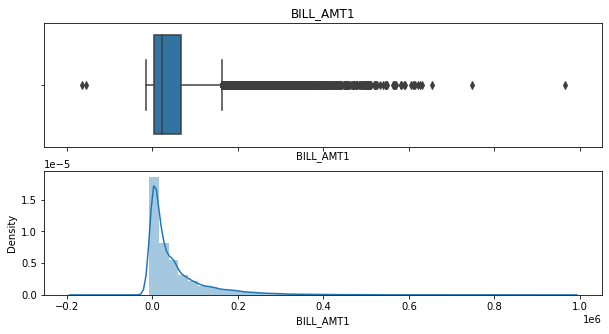

Min: 			 -165,580
Lower Quartile: 	 3,559
median: 		 22,382
mean: 			 51,223
Upper Quartile: 	 67,091
max: 			 964,511


Skew: 			 2.66
Kurtosis: 		 9.81


In [34]:
# 3. 'BILL_AMT1'
# Amount of bill statement in September, 2005 (NT dollar)
input_series = df['BILL_AMT1']
inspect_num_column(input_series)

The column may need to be rebalanced.

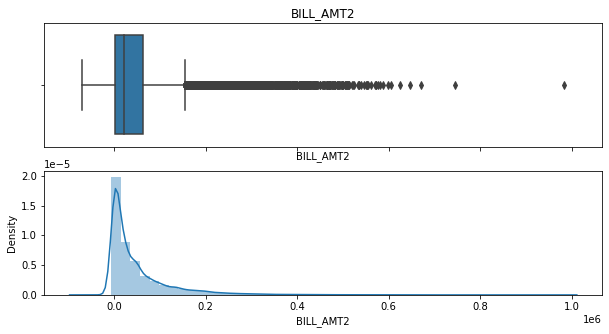

Min: 			 -69,777
Lower Quartile: 	 2,985
median: 		 21,200
mean: 			 49,179
Upper Quartile: 	 64,006
max: 			 983,931


Skew: 			 2.71
Kurtosis: 		 10.30


In [35]:
# 4. 'BILL_AMT2'
# Amount of bill statement in August, 2005 (NT dollar)
input_series = df['BILL_AMT2']
inspect_num_column(input_series)

The column may need to be rebalanced.

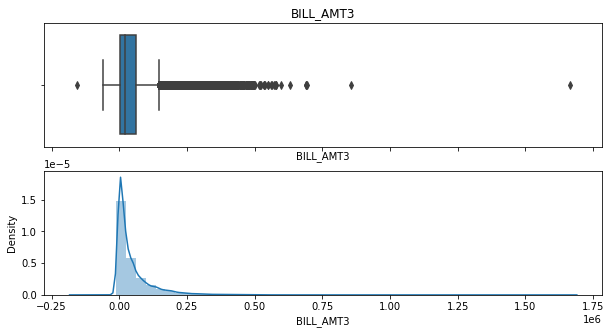

Min: 			 -157,264
Lower Quartile: 	 2,666
median: 		 20,088
mean: 			 47,013
Upper Quartile: 	 60,165
max: 			 1,664,089


Skew: 			 3.09
Kurtosis: 		 19.78


In [36]:
# 5. 'BILL_AMT3'
# Amount of bill statement in July, 2005 (NT dollar)
input_series = df['BILL_AMT3']
inspect_num_column(input_series)

The column may need to be rebalanced.

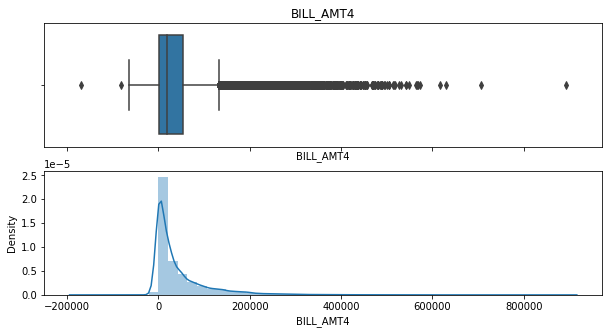

Min: 			 -170,000
Lower Quartile: 	 2,327
median: 		 19,052
mean: 			 43,263
Upper Quartile: 	 54,506
max: 			 891,586


Skew: 			 2.82
Kurtosis: 		 11.31


In [37]:
# 6. 'BILL_AMT4'
# Amount of bill statement in July, 2005 (NT dollar)
input_series = df['BILL_AMT4']
inspect_num_column(input_series)

The column may need to be rebalanced.

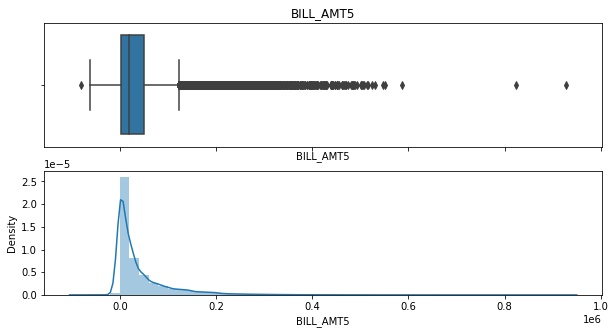

Min: 			 -81,334
Lower Quartile: 	 1,763
median: 		 18,104
mean: 			 40,311
Upper Quartile: 	 50,190
max: 			 927,171


Skew: 			 2.88
Kurtosis: 		 12.31


In [38]:
# 7. 'BILL_AMT5'
# Amount of bill statement in July, 2005 (NT dollar)
input_series = df['BILL_AMT5']
inspect_num_column(input_series)

The column may need to be rebalanced.

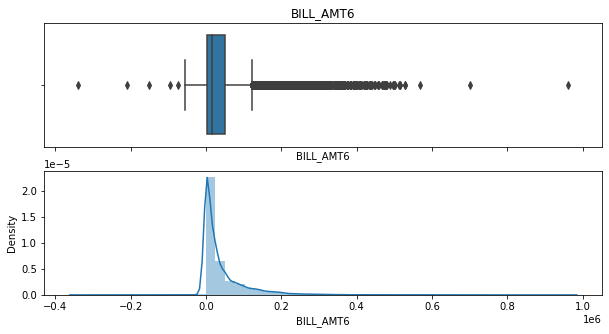

Min: 			 -339,603
Lower Quartile: 	 1,256
median: 		 17,071
mean: 			 38,872
Upper Quartile: 	 49,198
max: 			 961,664


Skew: 			 2.85
Kurtosis: 		 12.27


In [39]:
# 8. 'BILL_AMT6'
# Amount of bill statement in July, 2005 (NT dollar)
input_series = df['BILL_AMT6']
inspect_num_column(input_series)

The column may need to be rebalanced.

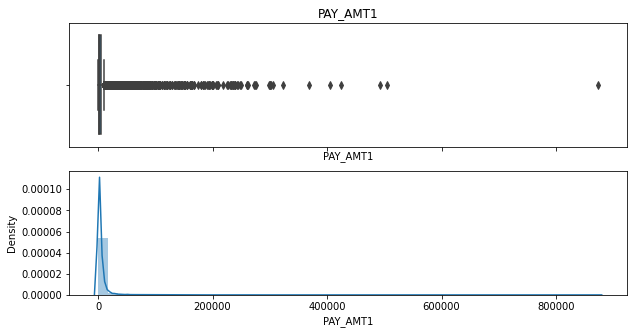

Min: 			 0
Lower Quartile: 	 1,000
median: 		 2,100
mean: 			 5,664
Upper Quartile: 	 5,006
max: 			 873,552


Skew: 			 14.67
Kurtosis: 		 415.25


In [40]:
# 9. 'PAY_AMT1'
# Amount of previous payment in September, 2005 (NT dollar)
input_series = df['PAY_AMT1']
inspect_num_column(input_series)

The column may need to be rebalanced.

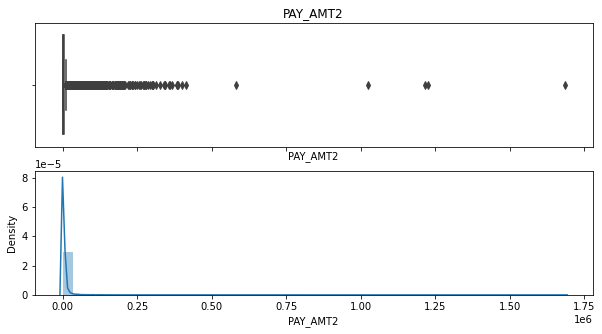

Min: 			 0
Lower Quartile: 	 833
median: 		 2,009
mean: 			 5,921
Upper Quartile: 	 5,000
max: 			 1,684,259


Skew: 			 30.45
Kurtosis: 		 1,641.63


In [41]:
# 10. 'PAY_AMT2'
# Amount of previous payment in September, 2005 (NT dollar)
input_series = df['PAY_AMT2']
inspect_num_column(input_series)

The column may need to be rebalanced.

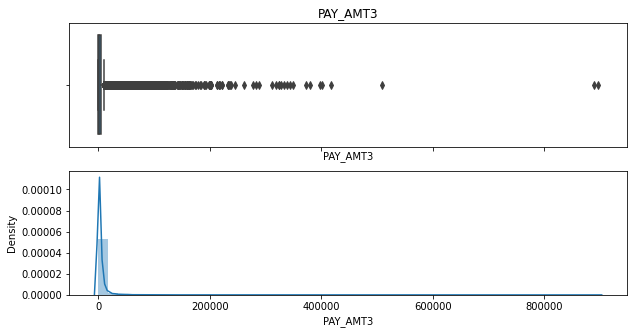

Min: 			 0
Lower Quartile: 	 390
median: 		 1,800
mean: 			 5,226
Upper Quartile: 	 4,505
max: 			 896,040


Skew: 			 17.22
Kurtosis: 		 564.31


In [42]:
# 11. 'PAY_AMT3'
# Amount of previous payment in September, 2005 (NT dollar)
input_series = df['PAY_AMT3']
inspect_num_column(input_series)

The column may need to be rebalanced.

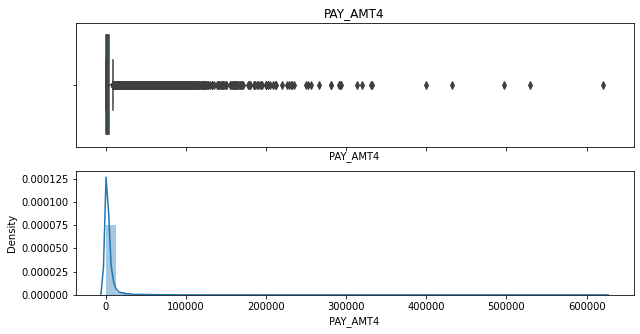

Min: 			 0
Lower Quartile: 	 296
median: 		 1,500
mean: 			 4,826
Upper Quartile: 	 4,013
max: 			 621,000


Skew: 			 12.90
Kurtosis: 		 277.33


In [43]:
# 12. 'PAY_AMT4'
# Amount of previous payment in September, 2005 (NT dollar)
input_series = df['PAY_AMT4']
inspect_num_column(input_series)

The column may need to be rebalanced.

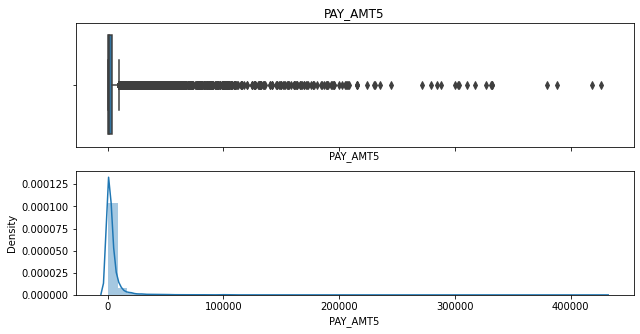

Min: 			 0
Lower Quartile: 	 252
median: 		 1,500
mean: 			 4,799
Upper Quartile: 	 4,032
max: 			 426,529


Skew: 			 11.13
Kurtosis: 		 180.06


In [44]:
# 13. 'PAY_AMT5'
# Amount of previous payment in September, 2005 (NT dollar)
input_series = df['PAY_AMT5']
inspect_num_column(input_series)

The column may need to be rebalanced.

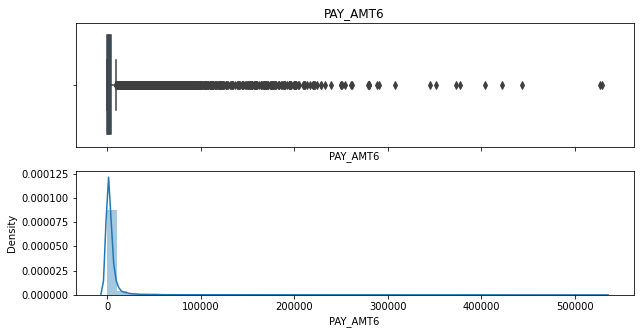

Min: 			 0
Lower Quartile: 	 118
median: 		 1,500
mean: 			 5,216
Upper Quartile: 	 4,000
max: 			 528,666


Skew: 			 10.64
Kurtosis: 		 167.16


In [45]:
# 14. 'PAY_AMT6'
# Amount of previous payment in September, 2005 (NT dollar)
input_series = df['PAY_AMT6']
inspect_num_column(input_series)

The column may need to be rebalanced.

#### Manipulations done and insights found

* We did some basic data manipulations and renamed complex column names after copying the original dataset. 
* We changed the data type of the variables and converted a few variables into categorical columns which are necessary for the model to understand. 
* We checked our dependent variable and finds out that the dependent variable may need to be rebalanced.
* We checked all categorical variables and from that 'EDUCATION' column values has been reassigned.
* We checked all numerical variables and finds out that almost every numerical column has a lot of outliers which we will remove before feature engineering.

## **4. Data Visualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

Since 'DP_NEXT_MONTH' is our dependent variable, we need to use a visualization plot to compare this column to the other columns. Before moving on to the other columns, we first examine the category data type.

Let us see how 'DP_NEXT_MONTH' = number of credit defaulters varies across different categories 

#### **Chart 1 - Pie Chart on Dependant Variable i.e., DP_NEXT_MONTH (Univariate Analysis)**

0    23364
1     6636
Name: DP_NEXT_MONTH, dtype: int64
 


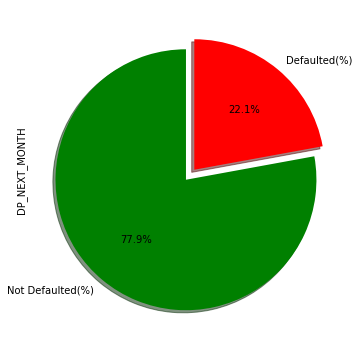

In [46]:
# Chart - 1 visualization code
# Dependant Column Value Counts
print(df.DP_NEXT_MONTH.value_counts())
print(" ")
# Dependant Variable Column Visualization
df['DP_NEXT_MONTH'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Not Defaulted(%)','Defaulted(%)'],
                               colors=['green','red'],
                               explode=[0.1,0]
                              )

##### 1. Why did you pick the specific chart?

Data can be organized and displayed as a percentage of the total using a pie chart. This kind of visualization, true to its name, uses a circle to represent the whole and slices of that circle, or "pies," to represent the particular categories that make up the whole. 

Because DP_NEXT_MONTH is a categorical variable, a pie chart is more crucial for comprehending how the dependent variable is distributed.

##### 2. What is/are the insight(s) found from the chart?

From the above chart I got to know that, there are 23364 customers which have not defaulted which is 77.9% of the whole clients data given in the dataset. On other hand, 6636 customers have defaulted which is 22.1% of the whold customers data given in the dataset.

22.1% customers are defaulted which might look like a small number, but from a banking institution prospective it is a huge sum of non-performing assets. So, Immediate action should be taken.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Default is when a debt, whether a loan or a security, is not paid back in full, either in terms of interest or principal. Debt can be defaulted on by individuals, businesses, and even nations. Default risk is a significant thought for lenders.

When a borrower fails to make a payment and continues to do so in the future, the financial institution's non-performing assets increase. Morever cibil score of borrower will have negative impact.

Any business can incur significant costs from an increase in NPAs. This gives the company a bad reputation in the market, which makes it harder for the company to market and an increase in NPAs can even result in the company's bankruptcy. 

In [47]:
df.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DP_NEXT_MONTH
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


#### <b> Chart 2 - DP_NEXT_MONTH Vs SEX (Bivariate Analysis)</b>


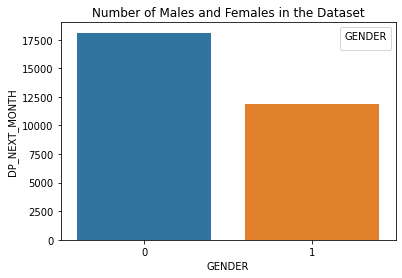

In [58]:
# Chart - 2 visualization code
# Dependant Column Value Vs SEX
fig = plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df['DP_NEXT_MONTH'], x=df['SEX'])
ax.set(xlabel='GENDER', ylabel='DP_NEXT_MONTH', title='Number of Males and Females in the Dataset')
plt.legend(title = 'GENDER')

#####Checking for outliers on Season column

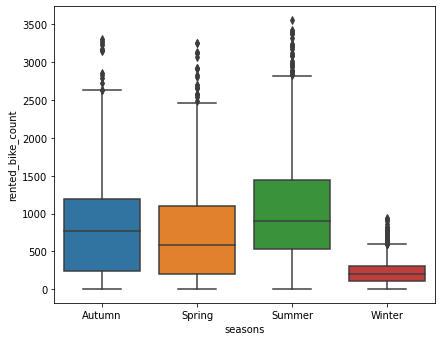

In [ ]:
# Checking outliers in the box plot
fig = plt.figure(figsize=(15, 12))
axes = fig.add_subplot(2, 2, 2)
sns.boxplot(data=bike_df, y='rented_bike_count', x='seasons')

##### 1. Why did you pick the specific chart?

The frequency counts of values at various levels of a categorical or nominal variable are depicted in bar charts. Other statistics, such as percentages, are sometimes displayed in bar charts.

I used a bar chart to show the average number of rented_bike_count by season.
I used a box plot to check the outliers in this column about rented_bike_count.

##### 2. What is/are the insight(s) found from the chart?

The most preferred season for the rented_bike_count is summer and the least preferred is winter which means that people prefer to rent bikes in warm temperatures.

Bike reservations are lesser in the Spring season compared to Summer and Autumn.
Lots of outlier points for particular seasons. This is most likely due to variable distribution across the day.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

In terms of the number of rented bikes, this insight is helpful, and owners must manage demand in accordance with requirements. The management of supply and demand can benefit from this information.

#### <b>Chart 3 - Rented Bike Count Vs Functioning Day (Bivariate Analysis)
</b>

[Text(0, 0.5, 'rented_bike_count'),
 Text(0.5, 0, 'functioning_day'),
 Text(0.5, 1.0, 'Average bike rentals across Functioning Day')]

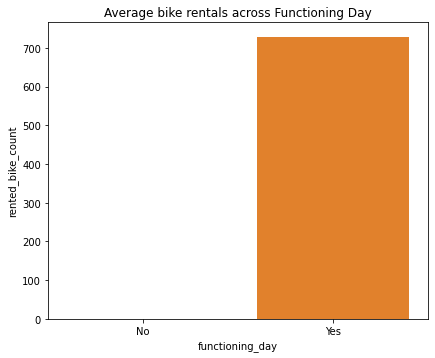

In [ ]:
# Chart - 3 visualization code
# Dependant Column Value Vs functioning_day
fig = plt.figure(figsize=(15, 12))
axes = fig.add_subplot(2, 2, 2)
group_workingday = bike_df.groupby(['functioning_day'])['rented_bike_count'].mean().reset_index()
ax = sns.barplot(data=group_workingday, x='functioning_day', y='rented_bike_count')
ax.set(xlabel='functioning_day', ylabel='rented_bike_count', title='Average bike rentals across Functioning Day')

##### Checking for outliers on Functioning Day column

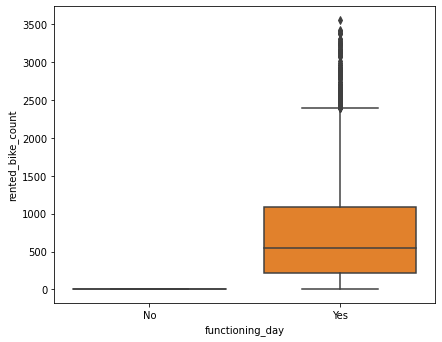

In [ ]:
# Checking outliers in the box plot
fig = plt.figure(figsize=(15, 12))
axes = fig.add_subplot(2, 2, 2)
sns.boxplot(data=bike_df, y='rented_bike_count', x='functioning_day')

##### 1. Why did you pick the specific chart?

To analyze the  functioning_day column, I have selected two charts: one is a bar chart, and the other is a box plot.

The frequency counts of values at various levels of a categorical or nominal variable are depicted in bar charts. Other statistics, such as percentages, are sometimes displayed in bar charts.

I used a bar chart to show the number of rented_bike_count by functioning_day.
I used a box plot to show the outliers in this column about rented_bike_count.

##### 2. What is/are the insight(s) found from the chart?

During business hours, there is a lot of demand for bike-sharing services, which could be because many customers use these bikes to get to work. When it is not a functioning_day, there is no demand for rented bicycles.

In the functioning_day column, there are some outliers that we need to get rid of or treat.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this is yet another very insightful piece of information, as a no functioning day has no demand for rented_bike_count, whereas a functioning_day has a high demand for rented bikes.

#### <b>Chart 4 - Rented Bike Count Vs Holiday (Bivariate Analysis)
</b>

[Text(0, 0.5, 'rented_bike_count'),
 Text(0.5, 0, 'holiday'),
 Text(0.5, 1.0, 'Average bike rentals across Holiday')]

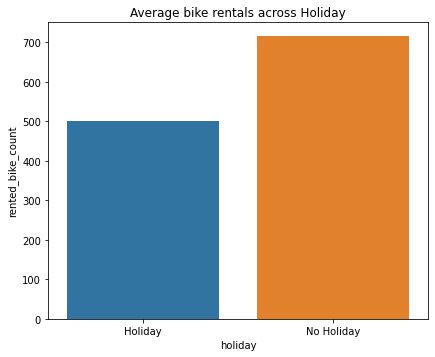

In [ ]:
# Chart - 4 visualization code
# Dependant Column Value Vs holiday
fig = plt.figure(figsize=(15, 12))
axes = fig.add_subplot(2, 2, 2)
group_holiday = bike_df.groupby(['holiday'])['rented_bike_count'].mean().reset_index()
ax = sns.barplot(data=group_holiday, x='holiday', y='rented_bike_count')
ax.set(xlabel='holiday', ylabel= 'rented_bike_count', title='Average bike rentals across Holiday')

##### Checking for outliers on Holiday Column

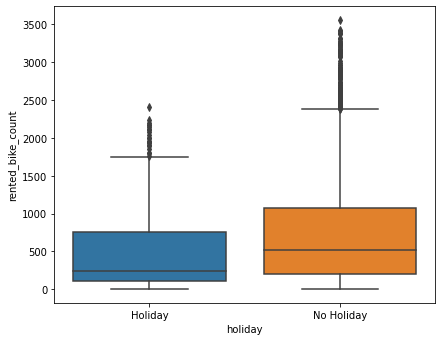

In [ ]:
# Checking outliers in the box plot
fig = plt.figure(figsize=(15, 12))
axes = fig.add_subplot(2, 2, 2)
sns.boxplot(data=bike_df, y='rented_bike_count', x='holiday')

##### 1. Why did you pick the specific chart?

For the holiday column analysis, I have chosen two charts: a box plot and a bar chart.

The frequency counts of values at various levels of a categorical or nominal variable are depicted in bar charts. Other statistics, such as percentages, are sometimes displayed in bar charts.

I used a bar chart to show the number of rented_bike_count by holiday.
To show the outliers in this section I have utilized a box plot regarding rented_bike_count.

##### 2. What is/are the insight(s) found from the chart?

When there are no holidays, demand for bike sharing is higher than when there are holidays, indicating that business-related bike rentals are preferred.

In the holiday column, there are some outliers that we need to get rid of or treat.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this is yet another extremely insightful data point: if the day is not a holiday, there will be a high demand for the number of rented bikes, whereas if the day is a holiday, there will be a low demand for rented bikes.

#### <b>Chart 5 - Rented Bike Count Vs Temperature (Bivariate Analysis)

In [ ]:
# group temperature column
temp_wrt_bike_rent_count = bike_df.groupby(['temperature'])['rented_bike_count'].mean().reset_index()

Text(0.5, 1.0, 'Average rented bike count wrt temperature')

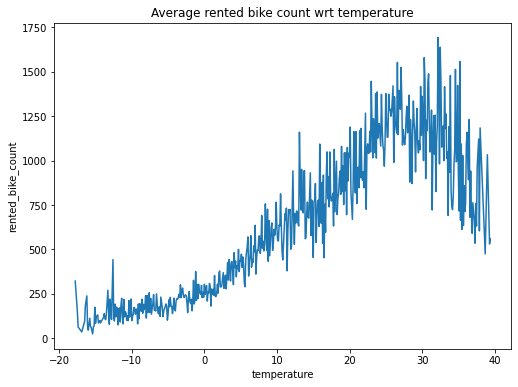

In [ ]:
# Chart - 5 visualization code
# Dependant Column Value Vs temperature
fig = plt.figure(figsize=(18, 6))
axes = fig.add_subplot(1, 2, 1)
ax = sns.lineplot(x = 'temperature', y ='rented_bike_count', data = temp_wrt_bike_rent_count)
ax.set_title('Average rented bike count wrt temperature')

##### 1. Why did you pick the specific chart?

A line chart is used to show how information has changed over time. The horizontal axis is typically a time scale; for example, minutes, seconds, days, weeks, or years.

Since temperature is a continuous variable and we must determine the optimal temperature for rented_bike_count, I've chosen a line chart to display the temperature column.

##### 2. What is/are the insight(s) found from the chart?

We can see from the line plot above that the average number of bikes rented with temperature increases steadily, with a slight decrease at the highest temperature.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This confirms once more our analysis of the seasons column, which revealed that people prefer renting bikes in warm environments. Therefore, the demand for bicycles will be high if the temperature is sufficiently warm, but extremely hot temperatures are also unsuitable for bike demand.

#### <b> Chart 6 - Hourly Rented Bike Counts Distribution (Multivariate Analysis)

##### Hourly distribution Vs rented_bike_count over holiday 

[Text(0.5, 1.0, 'Hourly Count based on Holiday or not')]

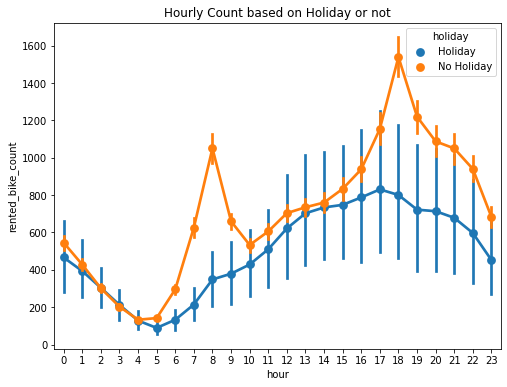

In [ ]:
# Chart - 6 visualization code
# Dependant Column Value Vs hour with holiday
f, axes = plt.subplots(1, 1, figsize=(8, 6))
sns.pointplot(data=bike_df, y='rented_bike_count', x='hour', ax=axes, hue= 'holiday')
axes.set(title='Hourly Count based on Holiday or not')

##### Hourly distribution Vs rented bike count over weekend

[Text(0, 0.5, 'rented_bike_count'),
 Text(0.5, 0, 'Hour in the day'),
 Text(0.5, 1.0, 'Average Bike Rentals by the day across Weekdays and Weekends')]

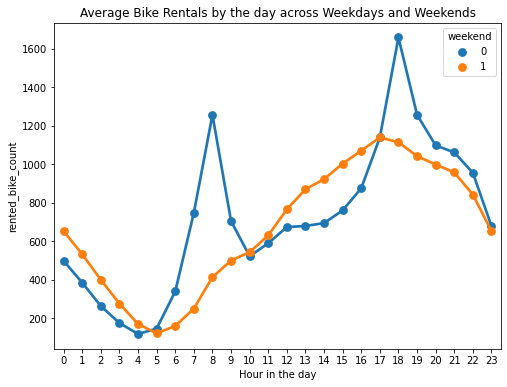

In [ ]:
# Chart - 6 visualization code
# Dependant Column Value Vs hour with weekend
f, axes = plt.subplots(1, 1, figsize=(8, 6))
group_day_hour = bike_df.groupby(['weekend', 'hour'])['rented_bike_count'].mean().reset_index()
ax =sns.pointplot(data=group_day_hour, x='hour', y='rented_bike_count', hue='weekend')
ax.set(xlabel='Hour in the day', ylabel='rented_bike_count', title='Average Bike Rentals by the day across Weekdays and Weekends')

##### 1. Why did you pick the specific chart?

Point charts are useful for clearly displaying quantitative data. Plotting data along an ordinal axis with point charts requires multiple points. A point chart is equivalent to a line chart without lines. It only displays the data points.

I've chosen two point charts to watch the hour column. Hour is a categorical variable that appears to be a numerical variable; therefore, we need to determine which hour is most popular in relation to rented_bike_count.

Additionally, I used the hue command to display the hourly distribution of rented_bike_count during holidays and weekends.

##### 2. What is/are the insight(s) found from the chart?

From the above line plot, we can see that demand for the bike is high at the business hour which is obvious as people are renting the bike for the business purposes.

* Lesser number of outliers can be seen in the seaborn box plot across hours indicating that most of the outliers are due to highly varying distribution during the day.
* Higher reservations can be seen at around 8 am and 5 pm (office hours) and close to 0 reservations very early in the morning.
* From the above plot, we can see the 2 patterns across the hours in a day in bike rentals.
* Working Day: The first pattern is where there is a peak in the rentals at around 8 am and another at around 5 pm. These correspond to working local bikers who typically go to work on the working day which is Monday to Friday.
* Non-Working Day: Second pattern where there are more or less uniform rentals across the day with a peak at around noon time. These correspond to probably tourists who typically are casual users who rent/drop off bikes uniformly during the day and tour the city on nonworking days which typically are Saturday and Sunday

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

In order to better manage the demand for bike sharing, bike stores must prepare for two types of demand—demand on weekends and non-weekends.

####<b>Chart 7 - Monthly Distribution of Rented Bike Count (Multivariate Analysis)

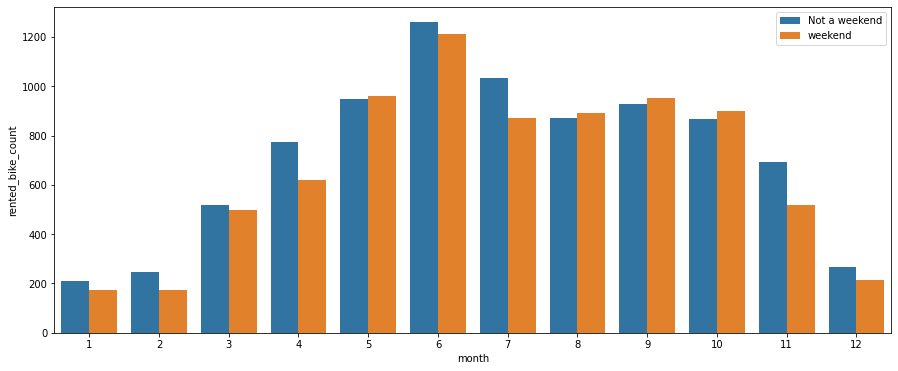

In [ ]:
# Chart - 7 visualization code
# Dependant Column Value Vs month with weekend
# Average Monthly Count Distribution plot
f, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
group_month = bike_df.groupby(['month', 'weekend'])['rented_bike_count'].mean().reset_index()
sns.barplot(data=group_month, x='month', y='rented_bike_count', hue='weekend')
ax.set(xlabel='Month', ylabel='rented_bike_count', title='Average bike rentals per Month')
handles, _ = axes.get_legend_handles_labels()
axes.legend(handles, ['Not a weekend', 'weekend'])
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the recurrence counts of values for the various levels of a categorical or nominal variable. Other statistics, such as percentages, are sometimes displayed in bar charts.

I used a bar chart to display the monthly average rented bike count. To compare the distribution, I have also visualized it using a different variable this weekend.

##### 2. What is/are the insight(s) found from the chart?

From May to October, there is a lot of demand, which shows that when the weather is good, people want to use bike-sharing services more.

When compared to when it's not a weekend, demand for bike sharing is higher on weekends, indicating that business travelers prefer to rent bikes.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The monthly distribution count of rented bikes enables distributors to manage demand and supply, which is good news for distributors. During the summer, demand is high.

####<b>Chart 8 - Weekend: Rented bike count Vs Hour with Temperature (Multivariate Analysis)

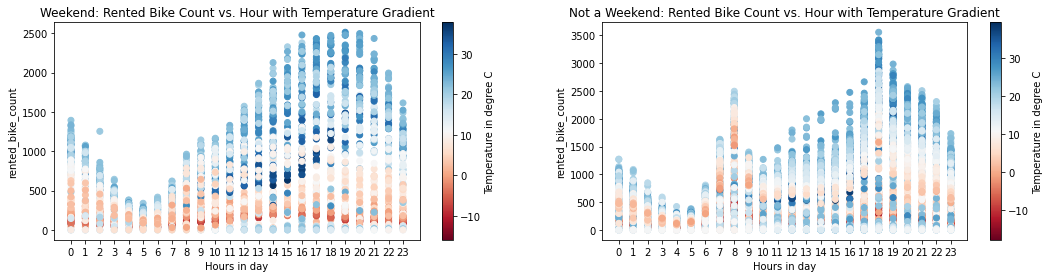

In [ ]:
# Chart - 8 visualization code
# Dependant Column Value Vs hour with temperature
bike_df_w = bike_df[bike_df.weekend==1]
bike_df_nw = bike_df[bike_df.weekend==0]

fig = plt.figure(figsize=(18, 4))
# Weekend
axes = fig.add_subplot(1, 2, 1)
f = axes.scatter(bike_df_w.hour, bike_df_w['rented_bike_count'], c=bike_df_w.temperature, cmap = 'RdBu')
axes.set(xticks = range(24), xlabel='Hours in day', ylabel='rented_bike_count', title='Weekend: Rented Bike Count vs. Hour with Temperature Gradient')
cbar = plt.colorbar(f)
cbar.set_label('Temperature in degree C')

# Not a Weekend
axes = fig.add_subplot(1, 2, 2)
f = axes.scatter(bike_df_nw.hour, bike_df_nw['rented_bike_count'], c=bike_df_nw.temperature, cmap = 'RdBu')
axes.set(xticks = range(24), xlabel='Hours in day', ylabel='rented_bike_count', title='Not a Weekend: Rented Bike Count vs. Hour with Temperature Gradient')
cbar = plt.colorbar(f)
cbar.set_label('Temperature in degree C')

plt.show()

##### 1. Why did you pick the specific chart?

The scatter plot is most frequently used to illustrate the nature of the relationship between two variables. Positive or negative, non-direct or straight, as well as significant areas of strength for the powerless, the observed connections can be found.

We use a scatter plot to comprehend the relationship between various variables for a multivariate analysis.

##### 2. What is/are the insight(s) found from the chart?

As can be seen from the preceding, a greater number of people generally prefer biking in temperatures between moderate and high; However, there is a slight decrease in count if the temperature is too high (darkest of the blue dots).

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Depending on the temperature and time of day, this analysis can be used for business purposes every day.

#### **Chart 9 - Rented Bike Count Vs Humidity (Bivariate Analysis)**

[Text(18.106250000000003, 0.5, 'rented_bike_count'),
 Text(0.5, 17.200000000000003, 'humidity'),
 Text(0.5, 1.0, 'Average bike rentals Vs Humidity')]

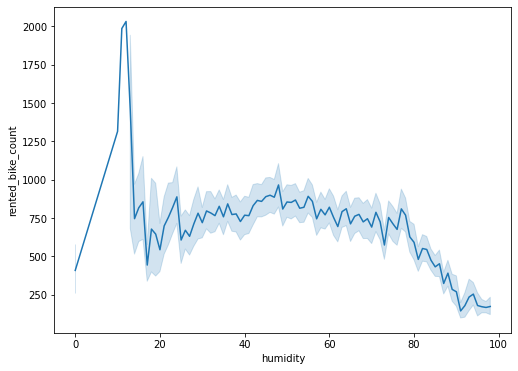

In [ ]:
# Chart - 9 visualization code
# Rented Bike count vs Humidity
fig = plt.figure(figsize=(18, 6))
axes = fig.add_subplot(1, 2, 1)
group_humidity = bike_df.groupby(['humidity'])['rented_bike_count'].mean().reset_index()
sns.lineplot(data=bike_df, x='humidity', y='rented_bike_count')
ax.set(xlabel='humidity', ylabel='rented_bike_count', title='Average bike rentals Vs Humidity')


##### 1. Why did you pick the specific chart?

A line chart is used to show how information has changed over time. The horizontal axis is typically a time scale; for example, minutes, seconds, days, weeks, or years.

Due to the fact that humidity is a continuous variable and we must determine the optimal humidity in relation to rented_bike_count, I chose a line chart to monitor the humidity column.

##### 2. What is/are the insight(s) found from the chart?

We can see from the line plot above that the average number of bikes rented with humidity goes up and down sharply. For the number of rented bikes in demand, the most preferred humid environment is 0-20.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

When the humidity in the air is between 0 and 20, the distributor can increase the number of bikes that can be rented to manage demand.

####**Chart 10 - Rented Bike Count Vs Wind Speed (Bivariate Analysis)**

[Text(0.5, 17.200000000000003, 'wind_speed'),
 Text(0.5, 1.0, 'Average bike rentals Vs wind_speed')]

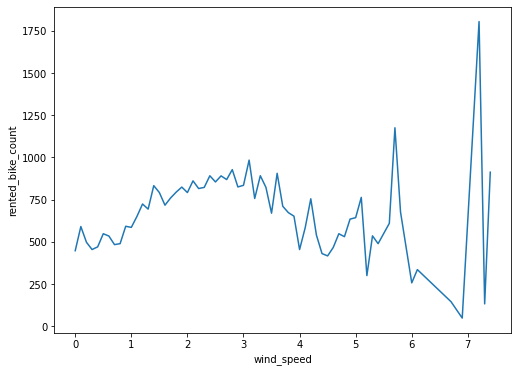

In [ ]:
# Chart - 10 visualization code
# Rented Bike count vs Wind Speed
fig = plt.figure(figsize=(18, 6))
axes = fig.add_subplot(1, 2, 1)
group_wind_speed = bike_df.groupby(['wind_speed'])['rented_bike_count'].mean().reset_index()
sns.lineplot(data=group_wind_speed, x='wind_speed', y = 'rented_bike_count')
ax.set(xlabel='wind_speed', title='Average bike rentals Vs wind_speed')

##### 1. Why did you pick the specific chart?

A line chart is used to show how information has changed over time. The horizontal axis is typically a time scale; for example, minutes, seconds, days, weeks, or years.

Because wind speed is a continuous variable and we need to determine the wind speed that is most favorable to the number of rented bikes, I chose a line chart to monitor the wind_speed column.

##### 2. What is/are the insight(s) found from the chart?

We can see from the line plot above that there is no clear relationship between wind_Speed and the number of rented bikes, indicating that other variables are more important.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We can take into account the wind speed if we want to, but it won't significantly affect the demand for rented bike count.

#### **Chart 11 - Rented Bike Count Vs Visibility (Bivariate Analysis)**

[Text(0.5, 17.200000000000003, 'visibility'),
 Text(0.5, 1.0, 'Average bike rentals Vs visibility')]

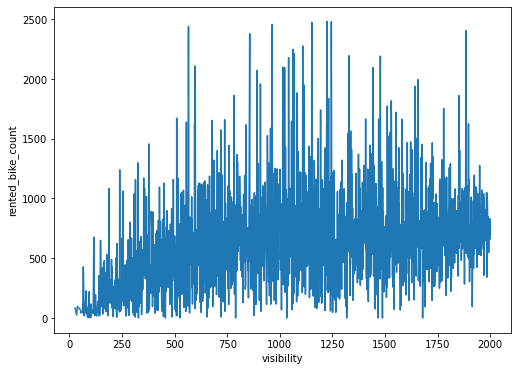

In [ ]:
# Chart - 11 visualization code
# Rented Bike count vs Wind Speed
fig = plt.figure(figsize=(18, 6))
axes = fig.add_subplot(1, 2, 1)
group_wind_speed = bike_df.groupby(['visibility'])['rented_bike_count'].mean().reset_index()
sns.lineplot(data=group_wind_speed, x='visibility', y = 'rented_bike_count')
ax.set(xlabel='visibility', title='Average bike rentals Vs visibility')

##### 1. Why did you pick the specific chart?

A line chart is used to show how information has changed over time. The horizontal axis is typically a time scale; for example, minutes, seconds, days, weeks, or years.

Because visibility is a continuous variable and we must determine the preferred visibility about rented_bike_count, I have chosen a line chart to observe the visibility column.

##### 2. What is/are the insight(s) found from the chart?

We can see from the line plot above that there is no obvious relationship between visibility and rented_bike_count; however, as visibility rises, so does rented_bike_count.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We can take into account visibility if we want to, but it won't significantly impact the demand for rented_bike_count.

#### **Chart 12 - Rented Bike Count Vs Dew Point Temperature (Bivariate Analysis)**

[Text(18.106250000000003, 0.5, 'rented_bike_count'),
 Text(0.5, 17.200000000000003, 'dew_point_temperature'),
 Text(0.5, 1.0, 'Average bike rentals Vs dew_point_temperature')]

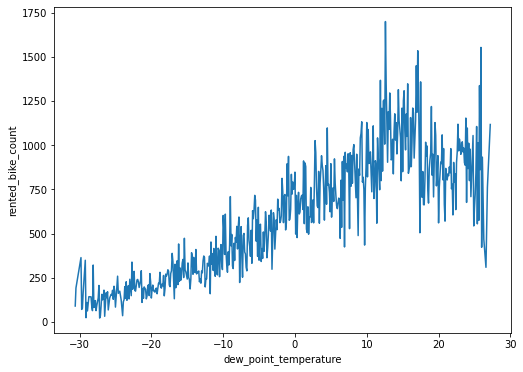

In [ ]:
# Chart - 12 visualization code
# Rented Bike count vs dew_point_temperature
fig = plt.figure(figsize=(18, 6))
axes = fig.add_subplot(1, 2, 1)
group_dew_point_temperature = bike_df.groupby(['dew_point_temperature'])['rented_bike_count'].mean().reset_index()
sns.lineplot(data = group_dew_point_temperature, x ='dew_point_temperature', y = 'rented_bike_count')
ax.set(xlabel='dew_point_temperature', ylabel='rented_bike_count', title='Average bike rentals Vs dew_point_temperature')

##### 1. Why did you pick the specific chart?

A line chart is used to show how information has changed over time. The horizontal axis is typically a time scale; for example, minutes, seconds, days, weeks, or years.

Since dew_point_temperature is a continuous variable and we need to find the most preferred dew_point_temperature about rented_bike_count, I chose a line chart to observe the dew_point_temperature column.

##### 2. What is/are the insight(s) found from the chart?

We can see from the line plot above that the average number of bikes rented with temperature increases steadily, with a slight decrease at the highest temperature. The rented bike count vs. temperature chart, which demonstrates a linear relationship between temperature and dew point temperature, is very similar to this one.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We've found that renting a bike in a warm environment is more popular. Therefore, the demand for bicycles will be high if the temperature is sufficiently warm, but extremely hot temperatures are also unsuitable for bike demand.

#### **Chart 13 - Rented Bike Count Vs Solar Radiation (Bivariate Analysis)**

[Text(18.106250000000003, 0.5, 'rented_bike_count'),
 Text(0.5, 17.200000000000003, 'solar_radiation'),
 Text(0.5, 1.0, 'Average bike rentals Vs solar_radiation')]

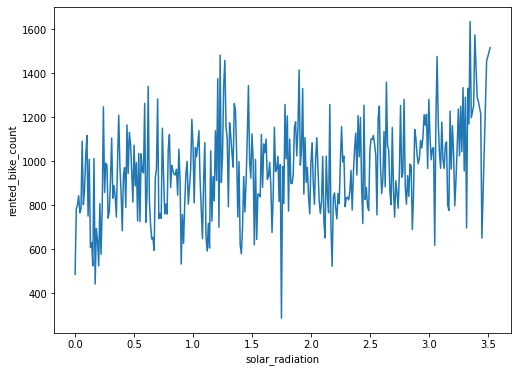

In [ ]:
# Chart - 13 visualization code
# Rented Bike count vs solar_radiation
fig = plt.figure(figsize=(18, 6))
axes = fig.add_subplot(1, 2, 1)
group_solar_radiation = bike_df.groupby(['solar_radiation'])['rented_bike_count'].mean().reset_index()
sns.lineplot(data = group_solar_radiation, x ='solar_radiation', y = 'rented_bike_count')
ax.set(xlabel='solar_radiation', ylabel='rented_bike_count', title='Average bike rentals Vs solar_radiation')

##### 1. Why did you pick the specific chart?

A line chart is used to show how information has changed over time. The horizontal axis is typically a time scale; for example, minutes, seconds, days, weeks, or years.

Because solar_radiation is a continuous variable and we need to find the solar_radiation that is most preferred about rented_bike_count, I chose a line chart to observe the solar_radiation column.

##### 2. What is/are the insight(s) found from the chart?

We can see from the line plot above that the average number of bikes rented goes up with solar radiation, with short-term sharp increases and decreases. Additionally, this column is directly related to the temperature column.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We've found that renting a bike in a warm environment is more popular. Therefore, the bike will be in high demand if the temperature rises sufficiently.

#### **Chart 14 - Rented Bike Count Vs Rainfall (Bivariate Analysis)**

[Text(18.106250000000003, 0.5, 'rented_bike_count'),
 Text(0.5, 17.200000000000003, 'rainfall'),
 Text(0.5, 1.0, 'Average bike rentals Vs rainfall')]

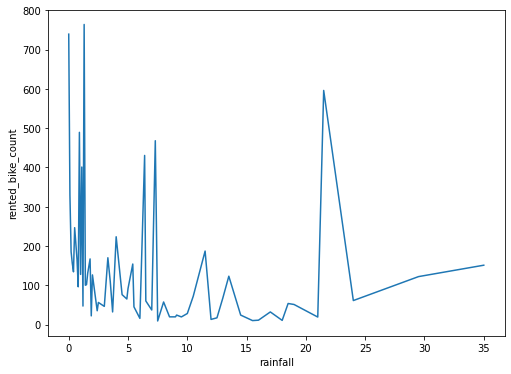

In [ ]:
# Chart - 14 visualization code
# Rented Bike count vs rainfall
fig = plt.figure(figsize=(18, 6))
axes = fig.add_subplot(1, 2, 1)
group_rainfall = bike_df.groupby(['rainfall'])['rented_bike_count'].mean().reset_index()
sns.lineplot(data = group_rainfall, x ='rainfall', y = 'rented_bike_count')
ax.set(xlabel='rainfall', ylabel='rented_bike_count', title='Average bike rentals Vs rainfall')

##### 1. Why did you pick the specific chart?

A line chart is used to show how information has changed over time. The horizontal axis is typically a time scale; for example, minutes, seconds, days, weeks, or years.

Since rainfall is a continuous variable and we must determine the most preferred rainfall about rented_bike_count, I chose a line chart to display the rainfall column.

##### 2. What is/are the insight(s) found from the chart?

We can see from the line plot above that there is no apparent connection between the number of rented bikes and rainfall.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We are able to take into account the rainfall if we so choose, but it has little effect on the demand for rented_bike_count.

#### **Chart 15 - Rented Bike Count Vs Snowfall (Bivariate Analysis)**

[Text(18.106250000000003, 0.5, 'rented_bike_count'),
 Text(0.5, 17.200000000000003, 'snowfall'),
 Text(0.5, 1.0, 'Average bike rentals Vs snowfall')]

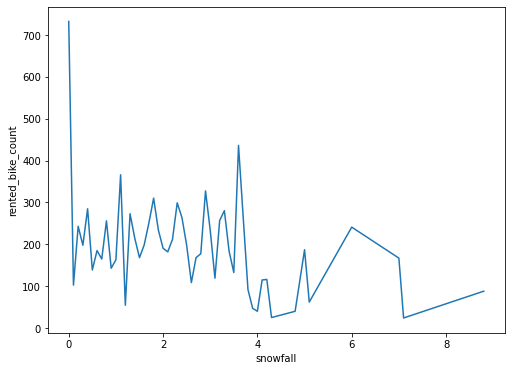

In [ ]:
# Chart - 15 visualization code
# Rented Bike count vs snowfall
fig = plt.figure(figsize=(18, 6))
axes = fig.add_subplot(1, 2, 1)
group_snowfall = bike_df.groupby(['snowfall'])['rented_bike_count'].mean().reset_index()
sns.lineplot(data = group_snowfall, x ='snowfall', y = 'rented_bike_count')
ax.set(xlabel='snowfall', ylabel='rented_bike_count', title='Average bike rentals Vs snowfall')

##### 1. Why did you pick the specific chart?

A line chart is used to show how information has changed over time. The horizontal axis is typically a time scale; for example, minutes, seconds, days, weeks, or years.

Since snowfall is a continuous variable and we must determine the most preferred snowfall in relation to rented_bike_count, I chose a line chart to display the snowfall column.

##### 2. What is/are the insight(s) found from the chart?

The line plot above reveals that there is no discernible correlation between snowfall and rented_bike_count; however, on a longer time frame, we can assert that there is a decrease in bike demand associated with an increase in snowfall.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

When the weather is clear and there isn't any snow, we can say that more people want bikes.

## **5. Outlier Analysis**

#### <b> Z score > 4 Pruning </b>
Let us first take a look at the data entries with zscore > 4, i.e., data with more than 4 standard deviation away from the mean.

In [ ]:
 # Function to calculate zscore
def zscore(series): 
    return (series-series.mean())/series.std()

bike_df['count_zscore'] = bike_df.groupby(['hour', 'functioning_day'])['rented_bike_count'].transform(zscore)
outlier_idx = np.abs(bike_df['count_zscore'])>4
outlier_data = bike_df.loc[outlier_idx, :]
print('Shape of the outlier data entries: ', outlier_data.shape)
outlier_data

Shape of the outlier data entries:  (1, 16)


,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,month,weekend,count_zscore
4922,1254,2,20.9,87,1.8,222,18.6,0.0,0.0,0.0,Summer,No Holiday,Yes,6,1,4.577229


Let us prune out this outliers. This could be due to some late night shows or holiday or some party.

In [ ]:
# Removing outliers from my data
bike_df_without_outliers = bike_df.loc[~outlier_idx, :]
print('Shape of data before outliner pruning: ', bike_df.shape)
print('Shape of data after outlier pruning: ', bike_df_without_outliers.shape)

Shape of data before outliner pruning:  (8760, 16)
Shape of data after outlier pruning:  (8759, 16)


Dropping the Zscore >4 column from the data frame

In [ ]:
# Dropping the zscore column
bike_df_without_outliers = bike_df_without_outliers.drop('count_zscore', axis=1)
bike_df_without_outliers.head(n=3)

,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,month,weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


#### <b> Correlation Analysis </b>
Regression Plots
* Using seaborn to get regression plots with respect to some features

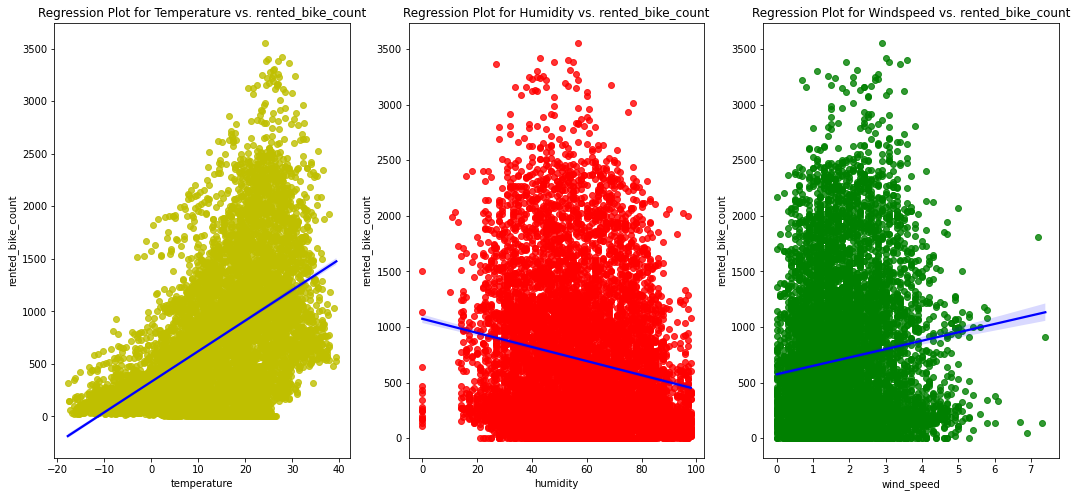

In [ ]:
# Regression Plots with respect to Temperature, Humidity and Windspeed
fig = plt.figure(figsize=(18, 8))
axes = fig.add_subplot(1, 3, 1)
sns.regplot(data =bike_df_without_outliers, x='temperature', y='rented_bike_count',ax=axes,scatter_kws={"color": 'y'}, line_kws={"color":"b"})
axes.set(title='Regression Plot for Temperature vs. rented_bike_count')
axes = fig.add_subplot(1, 3, 2)
sns.regplot(data=bike_df_without_outliers, x='humidity', y='rented_bike_count',ax=axes,scatter_kws={"color": 'r'}, line_kws={"color":"b"})
axes.set(title='Regression Plot for Humidity vs. rented_bike_count')
axes = fig.add_subplot(1, 3, 3)
sns.regplot(data=bike_df_without_outliers, x='wind_speed', y='rented_bike_count',ax=axes, scatter_kws={"color":'g'}, line_kws={"color":"b"})
axes.set(title='Regression Plot for Windspeed vs. rented_bike_count')
plt.show()

##### 1. Why did you pick the specific chart?

Seaborn regression plots serve primarily as a visual guide for highlighting patterns in a dataset during exploratory data analyses. Regression plots help to illustrate the linear relationships between two parameters by drawing a regression line between them, as the name suggests.

As a result, I used regression plots to determine the relationship between wind speed, humidity, and temperature.

##### 2. What is/are the insight(s) found from the chart?

The regression plot above shows that rented_bike_count has a positive correlation with temperature and windspeed and a negative correlation with humidity. We will check the relationship of all mathematical factors with one another through Heatmap.

#### <b> Heatmap Plot </b>
Obtaining correlation between the rental of bikes and other numerical features by making use of heatmap plots of all the numerical features

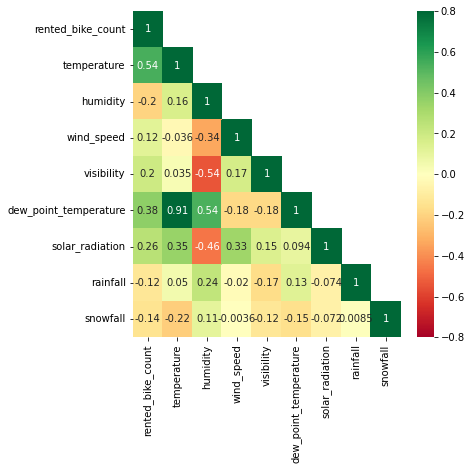

In [ ]:
# Heatmap relative to all numeric columns
corr_matrix = bike_df_without_outliers.corr()
mask = np.array(corr_matrix)
mask[np.tril_indices_from(mask)] = False

# Heatmap visualization
fig = plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, mask=mask, annot=True, cbar=True, vmax=0.8, vmin=-0.8, cmap='RdYlGn')
plt.show()

##### 1. Why did you pick the specific chart?

A heat map can be used to show density. In addition, it makes it simpler to visualize the relationship between variables and the dependent variable when conducting analysis.

I used a heatmap to determine the linear relationship between all the variables and the dependent variable.

##### 2. What is/are the insight(s) found from the chart?

* <b> Very Highly Correlated (0.7 - 0.9) : </b> temperature and dew_point_temperature are very highly correlated as expected.

* <b> Moderately Correlated (0.5 - 0.7) : </b> We see a moderate correlation between humidity and dew_point_temperature and temperature and rented_bike_count. This is probably only true for the range of temperatures provided.
* <b> Negative Correlation (less than 0) :</b> We see a negative correlation between visibility and humidity and solar_radiation and humidity. The more the humidity, the fewer people prefer to bike.
* <b> Low Correlation(near zero):</b> rented_bike_count has a weak dependence on windspeed, snowfall, and rainfall.

## **6. Feature Engineering & Data Pre-processing**

Numerous categorical columns are present. Each important and relevant categorical column will be converted into binary vector columns by us. Later, eliminate all unnecessary columns (redundant or very low correlation).

#### <b>Column transformations need to be done:</b>

* season: month column has a direct mapping with the season (Winter: January to March, Summer: April to June, Autumn: July to September, and Spring: October to December). Hence we will drop the season column.
* holiday and 'day': functioning_day = weekday and not a holiday. Since we noticed that there were two kinds of bike rental behaviors - during functioning days and not a functioning day, we will retain only the working day column and drop the 'day' and 'holiday' column
* functioning_day: After observing the bike rental trend, we propose to build 2 separate models for 1. if it is a weekend, and 2. if it is not a weekend. Hence, we can separate the data based on this column and drop the column.
* temperature: temperature and dew_point_temperature are highly correlated. Hence retain only the temperature column.
* wind speed, rainfall, and snowfall: Very poorly correlated with the count. Hence drop these columns.
* Date: Intuitively, there is should be no dependency on a date. Hence drop this column
* hour: Split hour column to hour_0, hour_1, ..., hour_23. Drop hour_23 since it is a function of the rest of the hour columns.
* month: Split month column to month_1, month_2, ..., month_12. Drop month_12 since it is a function of the rest of the month columns

In [ ]:
# Using numbers to represent categorical data to transform the categorical columns
season_dict = {'Spring':1, 'Summer':2, 'Autumn':3, 'Winter':4}
holiday_dict ={'No Holiday':0, 'Holiday': 1}
functioning_day_dict ={'No':0, 'Yes':1}

bike_df_without_outliers['seasons'] = bike_df_without_outliers['seasons'].map(season_dict)
bike_df_without_outliers['holiday'] = bike_df_without_outliers['holiday'].map(holiday_dict)
bike_df_without_outliers['functioning_day'] = bike_df_without_outliers['functioning_day'].map(functioning_day_dict)
bike_df_without_outliers.head(3)

,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,month,weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,4,0,1,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,4,0,1,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,4,0,1,12,0


In [ ]:
bike_df_without_outliers.head(3)

,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,month,weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,4,0,1,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,4,0,1,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,4,0,1,12,0


In [ ]:
# Dropping columns from the provided data set that are either highly correlated with the existing columns: 
# season with month, holiday and day with functioning_day, temperature with dew_point_temperature
# or poorly correlated with the target column: windspeed, rainfall and snowfall

to_drop = ['seasons', 'holiday', 'dew_point_temperature', 'wind_speed', 'rainfall', 'snowfall']
bike_df_without_outliers = bike_df_without_outliers.drop(to_drop, axis=1)
bike_df_without_outliers.head(n=3)

,rented_bike_count,hour,temperature,humidity,visibility,solar_radiation,functioning_day,month,weekend
0,254,0,-5.2,37,2000,0.0,1,12,0
1,204,1,-5.5,38,2000,0.0,1,12,0
2,173,2,-6.0,39,2000,0.0,1,12,0


####**Categorical Encoding - Transforming all the categorical columns into binary columns...**

In [ ]:
# Transforming all the categorical columns into binary columns
month=pd.get_dummies(bike_df_without_outliers['month'], prefix='month')
hour=pd.get_dummies(bike_df_without_outliers['hour'], prefix='hour')

bike_df_ready=pd.concat([bike_df_without_outliers, month, hour],axis=1)
bike_df_ready.columns

Index(['rented_bike_count', 'hour', 'temperature', 'humidity', 'visibility',
       'solar_radiation', 'functioning_day', 'month', 'weekend', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'hour_0',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23'],
      dtype='object')

In [ ]:
bike_df_without_outliers.head(3)

,rented_bike_count,hour,temperature,humidity,visibility,solar_radiation,functioning_day,month,weekend
0,254,0,-5.2,37,2000,0.0,1,12,0
1,204,1,-5.5,38,2000,0.0,1,12,0
2,173,2,-6.0,39,2000,0.0,1,12,0


Dropping columns and the last binary vector column (which are fully correlated and can be expressed as a function of other columns)

In [ ]:
# Dropping the last binary vector column 
to_drop2 = ['month_12', 'hour_23']
bike_df_ready = bike_df_ready.drop(to_drop2, axis=1)
bike_df_ready.columns

Index(['rented_bike_count', 'hour', 'temperature', 'humidity', 'visibility',
       'solar_radiation', 'functioning_day', 'month', 'weekend', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'hour_0', 'hour_1',
       'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8',
       'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14',
       'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20',
       'hour_21', 'hour_22'],
      dtype='object')

####**Normalise rented_bike_count (Dependent Variable) column**

##### Which method have you used to scale you data and why?

A fundamental component of data mining is data normalization, also known as data pre-processing. It refers to transforming the data, specifically converting the source data into a different format that makes it possible to effectively process the data. Data normalization's primary goal is to reduce or even eliminate duplicate data.

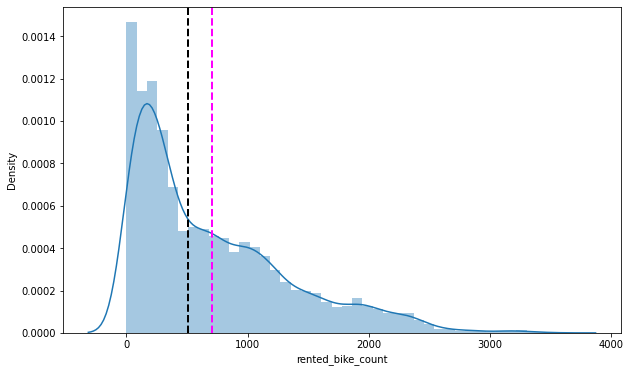

In [ ]:
# Distribution plot of Rented Bike Count
# density plot
plt.figure(figsize=(10,6))
ax=sns.distplot(bike_df_ready['rented_bike_count'],hist=True)
plt.xlabel('rented_bike_count')
plt.ylabel('Density')
ax.axvline(bike_df_ready['rented_bike_count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(bike_df_ready['rented_bike_count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

Right skewness is moderate in Rented Bike Count, as shown in the graph above. Since "the distribution of the dependent variable has to be normal" is the assumption of linear regression, we should carry out some action to make it normal.

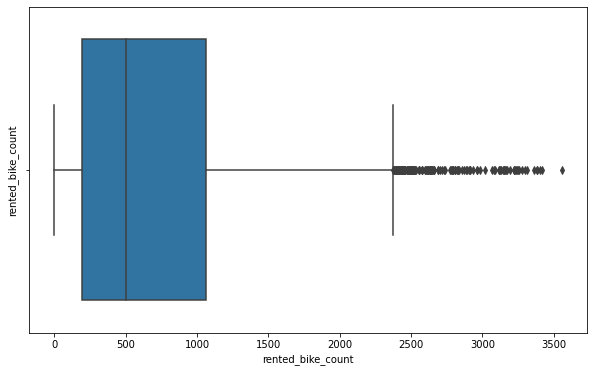

In [ ]:
# Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,6))
sns.boxplot(bike_df_ready['rented_bike_count'])
plt.ylabel('rented_bike_count')
plt.show()

The boxplot above demonstrates that outliers in the rented bike count column have been identified.

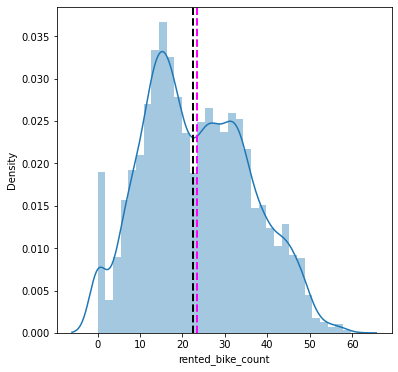

In [ ]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(6,6))
ax=sns.distplot(np.sqrt(bike_df_ready['rented_bike_count']))
plt.xlabel('rented_bike_count')
plt.ylabel('Density')
ax.axvline(np.sqrt(bike_df_ready['rented_bike_count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(bike_df_ready['rented_bike_count']).median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

After applying square root to the skewed Rented Bike Count, we obtain an almost normal distribution due to the general rule that the skewed variable must be made normal.

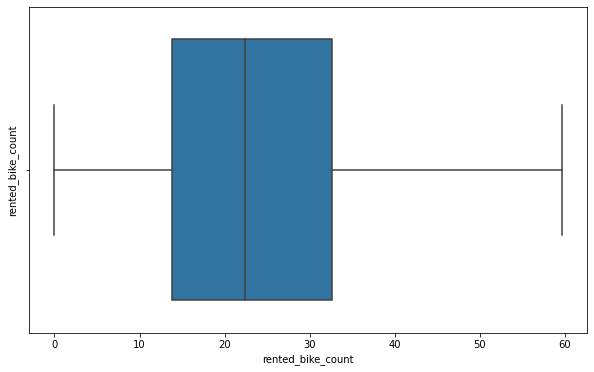

In [ ]:
#After applying sqrt on Rented Bike Count check wheater we still have outliers 
plt.figure(figsize=(10,6))
sns.boxplot(x=np.sqrt(bike_df_ready['rented_bike_count']))
plt.ylabel('rented_bike_count')
plt.show()

We find that there are no outliers in the Rented Bike Count column after applying square root.

####**Data Splitting**

<b>Train/Validation/Test Split:</b>

First split the labeled data provided into internal training and testing sets. 



In [ ]:
# Contains Binary Vector Form of features (Obtained from OneHotEncoder transformed categorical feature)
X = bike_df_ready.drop('rented_bike_count', axis=1)
y = np.sqrt(bike_df_ready['rented_bike_count'])

In [ ]:
#Creat test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(f'X_train shape =',X_train.shape)
print(f'X_test shape =',X_test.shape)
print(f'y_train shape =',y_train.shape)
print(f'y_test shape =',y_test.shape)

X_train shape = (6569, 42)
X_test shape = (2190, 42)
y_train shape = (6569,)
y_test shape = (2190,)


##### What data splitting ratio have you used and why? 

There are two issues at stake: Your parameter estimates exhibit greater variance with less training data. Your performance statistic will have greater variance with less testing data. In general, you should focus on dividing the data so that neither the absolute number of instances in each category nor the percentage is too high, which is more important.

If you have a sum of 100 cases, you're presumably staying with cross-approval as no single split will give you good fluctuation in your evaluations. If you have 100,000 instances, it doesn't matter if you split them 80:20 or 90:10 (although you might want to use less training data if your method requires a lot of computational power).

You might be surprised to learn that the 80/20 ratio—also known as the Pareto principle—occurs quite frequently. If you use that ratio, it is usually a safe bet.

The small training dataset in this instance necessitates a 75:25 ratio.

#### **Evaluation Metrics Used -**

* The mean squared error (MSE):- It tells you how close a regression line is to a set of points.

* Root Mean Square Error (RMSE):- It is the standard deviation of the residuals (prediction errors).

* Mean Absolute Error (MAE):- These are metrics used to evaluate a Regression Model. ... Here, errors are the absolute differences between the predicted values (values predicted by our regression model) and the actual values of a variable.

* R-squared (R2):- It is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

* Adjusted R-squared:- It is a modified version of R-squared that has been adjusted for the number of predictors in the model.
​


## **7. ML Model Implementation**

#### **1st Model - Linear Regression**

By fitting a line to the data, regression models describe the relationship between variables. The line used in linear regression models is straight.

The linear approach is used to model the relationship between independent and dependent variables in linear regression. Simply put, it is a line that best fits the values of the independent and dependent variables.

Allow us now to carry out our most memorable model.
Linear Regression from the Scikit library will be used.

In [ ]:
#import the packages
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [ ]:
#check the score
reg.score(X_train, y_train)

0.7572206937827596

In [ ]:
#check the coefficeint
reg.coef_

array([ 2.46645627e-01,  5.60119679e-01, -1.43402426e-01,  1.28750500e-03,
        1.22733903e+00,  2.90693362e+01,  7.75745501e+07, -1.24746738e+00,
        8.53320049e+08,  7.75745498e+08,  6.98170951e+08,  6.20596402e+08,
        5.43021854e+08,  4.65447305e+08,  3.87872749e+08,  3.10298196e+08,
        2.32723652e+08,  1.55149105e+08,  7.75745555e+07,  3.97469278e+00,
        1.99081268e+00, -1.04222744e+00, -3.97573113e+00, -6.14697743e+00,
       -5.93076997e+00, -1.27223078e+00,  4.93360906e+00,  1.02438739e+01,
        2.56203247e+00, -2.30238057e+00, -3.00961629e+00, -2.65221900e+00,
       -3.42162218e+00, -3.45517339e+00, -2.81340865e+00, -7.49070450e-01,
        2.62002802e+00,  9.08659345e+00,  5.72296927e+00,  5.46611530e+00,
        4.62620328e+00,  3.75181066e+00])

In [ ]:
#get the X_train and X-test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 37.49870759231109
RMSE : 6.123618831402808
MAE : 4.631941930070968
R2 : 0.7572206937827596
Adjusted R2 : 0.7524714013462789


Our r2 score appears to be 0.757, indicating that our model can account for the majority of the variance in the data. Let's store it in a dataframe so that we can compare it later.

In [ ]:
# storing the value of the test set metrics in a dataframe for comparing later
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),2),
       'MSE':round((MSE_lr),2),
       'RMSE':round((RMSE_lr),2),
       'R2_score':round((r2_lr),2),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [ ]:
# performance on test dataset
#import the packages
from sklearn.metrics import mean_squared_error

#calculate MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)

#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)

#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )


MSE : 39.75328509745072
RMSE : 6.305020626251014
MAE : 4.780139380147357
R2 : 0.7462667990840166
Adjusted R2 : 0.741303224590085


The r2_score for the test set is 0.746. This indicates that our linear model works well with the test data. Let's try to visualize our residuals to see if heteroscedasticity—also known as unequal variance or scatter—is present.

In [ ]:
# storing the value of the test set metrics in a dataframe for comparing later
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),2),
       'MSE':round((MSE_lr),2),
       'RMSE':round((RMSE_lr),2),
       'R2_score':round((r2_lr),2),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

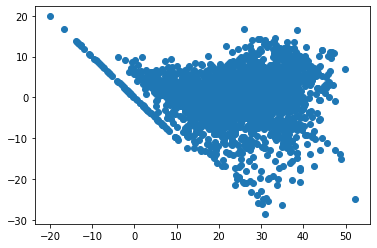

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))

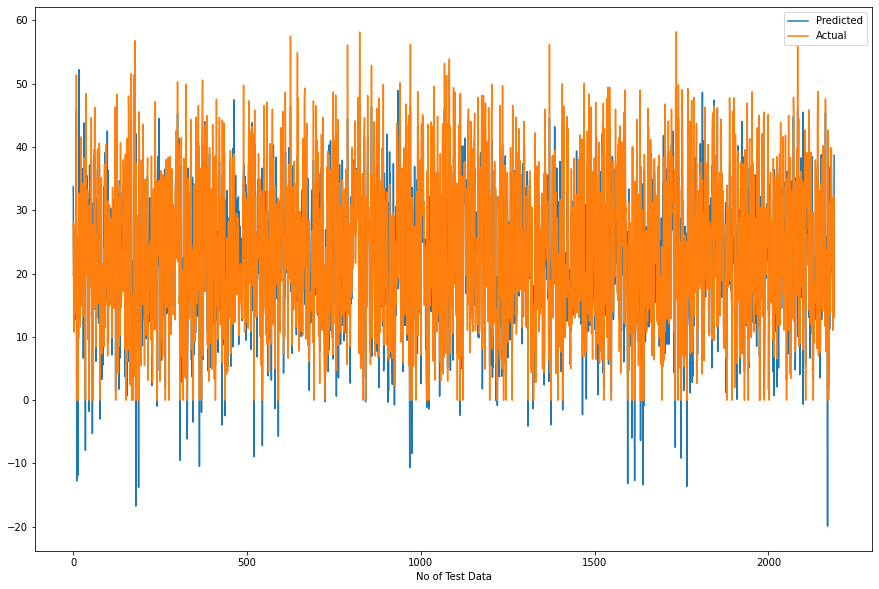

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

#### **2nd Model -Lasso (Regularization Model)** 

In [ ]:
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.4531383891444809 0.456976838882418


In [ ]:
#get the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)

#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)

from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 83.87315645584718
RMSE : 9.158228892959992
MAE : 6.791020865571764
R2 : 0.456976838882418
Adjusted R2 : 0.4463541221768109


Our r2 score appears to be 0.456, indicating that our model is unable to account for the majority of the variance in the data. Let's save it in a dataframe so that we can compare it later.

In [ ]:
# storing the value of the test set metrics in a dataframe to compare later
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),2),
       'MSE':round((MSE_l),2),
       'RMSE':round((RMSE_l),2),
       'R2_score':round((r2_l),2),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)

#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)

from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 85.67875802894649
RMSE : 9.256282084560004
MAE : 6.944204612053192
R2 : 0.4531383891444809
Adjusted R2 : 0.44244058399500175


The test set has an R2 score of 0.45. This indicates that the test data do not support our linear model's predictions. Let's try to visualize our residuals to see if heteroscedasticity—also known as unequal variance or scatter is present.

In [ ]:
# storing the test set metrics value in a dataframe to compare later
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

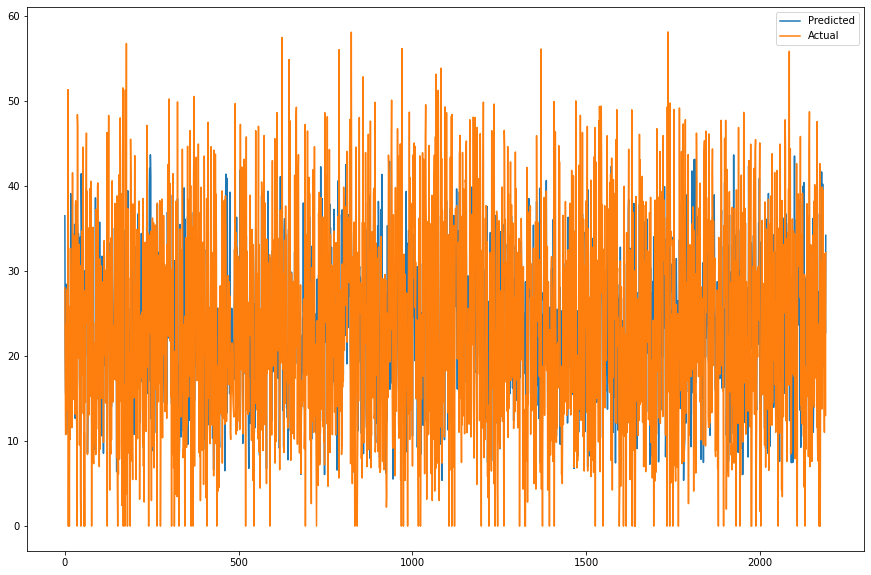

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

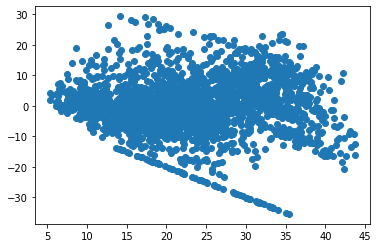

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))

#### **3rd Model -Ridge (Regularization Model)**

In [ ]:
#import the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)

In [ ]:
# Fit the model
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
# check the score
ridge.score(X_train, y_train)

0.7572206057354925

In [ ]:
# get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# import the packages
from sklearn.metrics import mean_squared_error
# calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

# calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)

# calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


# import the packages
from sklearn.metrics import r2_score
# calculate R2 and adjusted R2 score
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 37.49872119173508
RMSE : 6.123619941810161
MAE : 4.632035255522214
R2 : 0.7572206057354925
Adjusted R2 : 0.7524713115766154


Looks like our r2 score value is 0.757 that means our model is  able to capture most of the data variance. Lets save it in a dataframe to compare later.

In [ ]:
# storing the test set metrics value in a dataframe to compare later
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# import the packages
from sklearn.metrics import mean_squared_error
# calculate MSE
MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

# calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)

# calculate MAE
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)

# import the packages
from sklearn.metrics import r2_score
# calculate r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 39.751795604679025
RMSE : 6.304902505564938
MAE : 4.780231222524114
R2 : 0.7462763060660882
Adjusted R2 : 0.7413129175494491


The r2_score for the test set is 0.746. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter)

In [ ]:
# storing the test set metrics value in a dataframe to compare later
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
test_df=test_df.append(dict2,ignore_index=True)

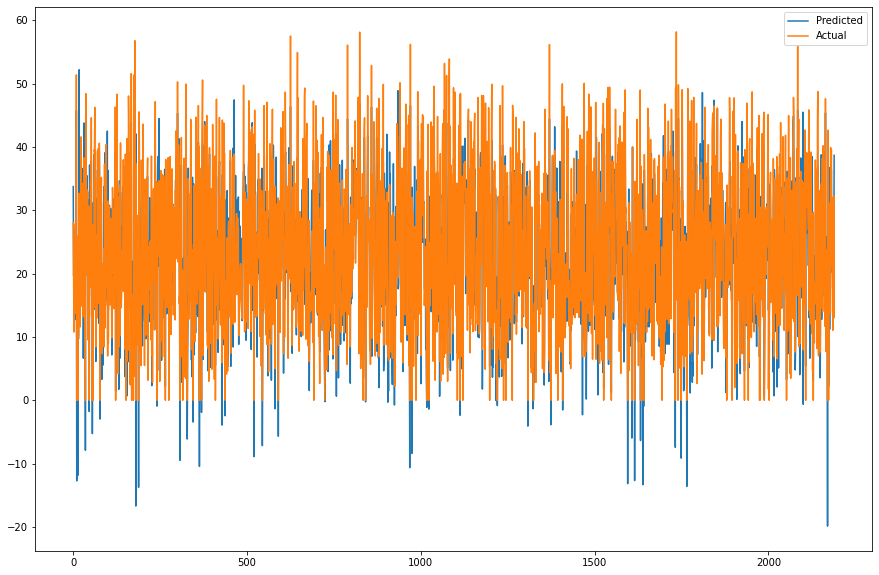

In [ ]:
# Plot the figure
plt.figure(figsize=(15,10))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

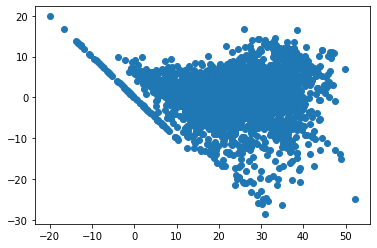

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))

#### **4th Model -Elastic Net (Regularization Model)**

In [ ]:
# import the packages
from sklearn.linear_model import ElasticNet
# a * L1 + b * L2
# alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
# Fit the model
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
# check the score
elasticnet.score(X_train, y_train)

0.6279010249947612

In [ ]:
# get the X_train and X-test value
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)

##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# import the packages
from sklearn.metrics import mean_squared_error
# calculate MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE_e)

# calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)

# calculate MAE
MAE_e= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE_e)


# import the packages
from sklearn.metrics import r2_score
# calculate r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_en)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 57.47289946794181
RMSE : 7.581088277281951
MAE : 5.73828610026378
R2 : 0.6279010249947612
Adjusted R2 : 0.6206219579476164


Looks like our r2 score value is 0.627 that means our model is  able to capture most of the data variance. Lets save it in a dataframe to compare it later.

In [ ]:
# storing the test set metrics value in a dataframe to compare it later
dict1={'Model':'Elastic net regression ',
       'MAE':round((MAE_e),2),
       'MSE':round((MSE_e),2),
       'RMSE':round((RMSE_e),2),
       'R2_score':round((r2_e),2),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# import the packages
from sklearn.metrics import mean_squared_error
# calculate MSE
MSE_e= mean_squared_error(y_test, y_pred_test_en)
print("MSE :",MSE_e)

# calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)

# calculate MAE
MAE_e= mean_absolute_error(y_test, y_pred_test_en)
print("MAE :",MAE_e)

# import the packages
from sklearn.metrics import r2_score
# calculate r2 and adjusted r2
r2_e= r2_score((y_test), (y_pred_test_en))
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 58.48835705215875
RMSE : 7.647768109204067
MAE : 5.858671650946587
R2 : 0.6266864986181269
Adjusted R2 : 0.6193836727876478


The r2_score for the test set is 0.626. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

In [ ]:
# storing the test set metrics value in a dataframe to compare it
dict2={'Model':'Elastic net regression Test',
       'MAE':round((MAE_e),2),
       'MSE':round((MSE_e),2),
       'RMSE':round((RMSE_e),2),
       'R2_score':round((r2_e),2),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
test_df=test_df.append(dict2,ignore_index=True)

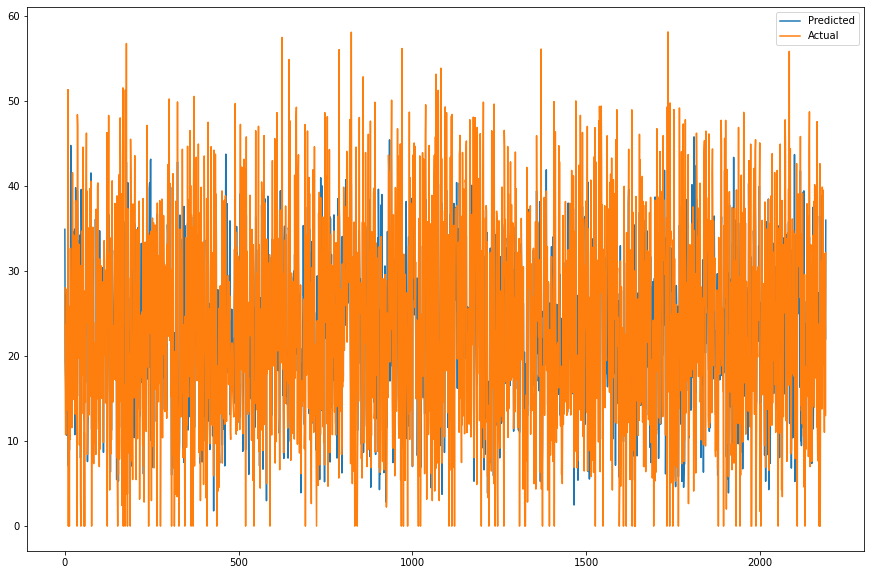

In [ ]:
# Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_en))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

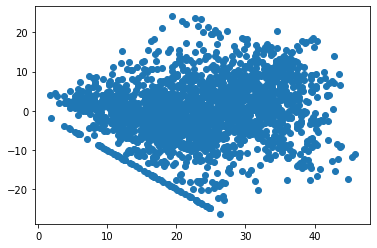

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_en),(y_test)-(y_pred_test_en))

#### **5th Model - Decision Tree**

In [ ]:
# import the packages
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [ ]:
# get the X_train and X-test value
y_pred_train_d = decision_regressor.predict(X_train)
y_pred_test_d = decision_regressor.predict(X_test)

##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(X_train,y_train))

# calculate MSE
MSE_d= mean_squared_error(y_train, y_pred_train_d)
print("MSE :",MSE_d)

# calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)

# calculate MAE
MAE_d= mean_absolute_error(y_train, y_pred_train_d)
print("MAE :",MAE_d)

# import the packages
from sklearn.metrics import r2_score
# calculate r2 and adjusted r2
r2_d= r2_score(y_train, y_pred_train_d)
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.7435732774773345
MSE : 39.606632198413
RMSE : 6.293380029714796
MAE : 4.52577751410227
R2 : 0.7435732774773345
Adjusted R2 : 0.7385570118294762


Looks like our r2 score value is 0.733 that means our model is  able to capture most of the data variance. Lets save it in a dataframe to compare it later.

In [ ]:
# storing the test set metrics value in a dataframe to compare it later
dict1={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# import the packages
from sklearn.metrics import mean_squared_error
# calculate MSE
MSE_d= mean_squared_error(y_test, y_pred_test_d)
print("MSE :",MSE_d)

# calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)

# calculate MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_d)
print("MAE :",MAE_d)

# import the packages
from sklearn.metrics import r2_score
# calculate r2 and adjusted r2
r2_d= r2_score((y_test), (y_pred_test_d))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 45.820490861128704
RMSE : 6.769083457982233
MAE : 4.833090571844648
R2 : 0.7075416588783676
Adjusted R2 : 0.7018205362295048


The r2_score for the test set is 0.718. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter)

In [ ]:
# storing the test set metrics value in a dataframe to compare it later
dict2={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),2),
       'MSE':round((MSE_d),2),
       'RMSE':round((RMSE_d),2),
       'R2_score':round((r2_d),2),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

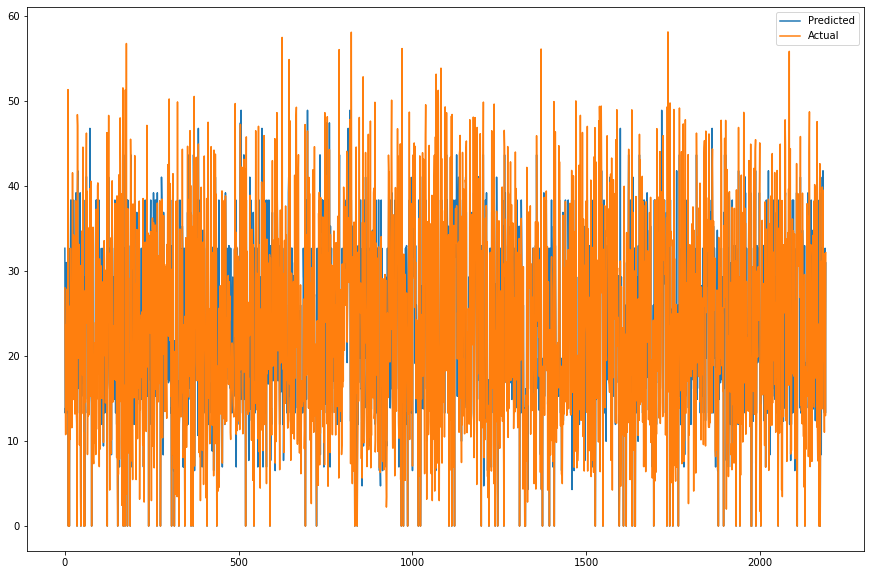

In [ ]:
# Plot the figure
plt.figure(figsize=(15,10))
plt.plot((np.array(y_pred_test_d)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

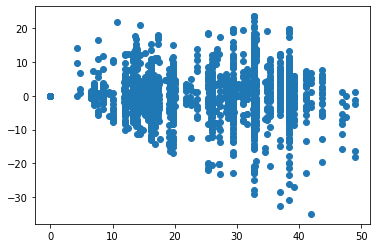

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_d),(y_test)-(y_pred_test_d))

#### **6th Model - Random Forest**

In [ ]:
# import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
# Making predictions on train and test data

y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)

##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,y_train))

# calculate MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

# calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)

# calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)

# import the packages
from sklearn.metrics import r2_score
# calculate r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9882563829622338
MSE : 1.8138714877998239
RMSE : 1.3468004632460682
MAE : 0.8164204669540243
R2 : 0.9882563829622338
Adjusted R2 : 0.9880266522144061


Looks like our r2 score value is 0.98 that means our model is  able to capture most of the data variance. Lets save it in a dataframe to compare it later.

In [ ]:
# storing the test set metrics value in a dataframe to compare it later
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),2),
       'MSE':round((MSE_rf),2),
       'RMSE':round((RMSE_rf),2),
       'R2_score':round((r2_rf),2),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# import the packages
from sklearn.metrics import mean_squared_error
# calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

# calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)

# calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)

# import the packages
from sklearn.metrics import r2_score
# calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 12.235830578432305
RMSE : 3.497975211237539
MAE : 2.1713307435613927
R2 : 0.9219023924457909
Adjusted R2 : 0.9203746330059787


The r2_score for the test set is 0.922. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).


In [ ]:
# storing the test set metrics value in a dataframe to compare it later
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),2),
       'MSE':round((MSE_rf),2),
       'RMSE':round((RMSE_rf),2),
       'R2_score':round((r2_rf),2),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=test_df.append(dict2,ignore_index=True)

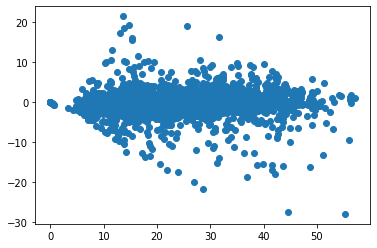

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_r),(y_test)-(y_pred_test_r))

In [ ]:
rf_model.feature_importances_

array([2.24658364e-01, 3.06974943e-01, 1.54493543e-01, 1.68950199e-02,
       3.73093905e-02, 1.59724927e-01, 1.93714895e-02, 2.42377685e-02,
       1.44744127e-04, 1.66809471e-04, 2.07797451e-03, 1.12108565e-03,
       1.22661737e-03, 3.23148366e-03, 9.23209579e-04, 2.46294463e-03,
       1.41033868e-03, 1.95253886e-03, 7.95469753e-03, 3.97611574e-04,
       3.28036004e-04, 1.14621703e-03, 6.08489189e-04, 4.30808318e-04,
       4.47978884e-04, 1.17451224e-03, 1.23387755e-03, 1.13885107e-02,
       4.45918531e-04, 9.90670744e-04, 2.99531860e-04, 3.91266954e-04,
       1.46017481e-04, 1.75441189e-04, 4.24921861e-04, 7.98945586e-04,
       1.05132923e-03, 9.23655393e-03, 9.70371135e-04, 4.41528470e-04,
       6.82699180e-04, 4.50872429e-04])

In [ ]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
1,temperature,0.31
0,hour,0.22
5,functioning_day,0.16
2,humidity,0.15
4,solar_radiation,0.04
3,visibility,0.02
6,month,0.02
7,weekend,0.02
27,hour_8,0.01
37,hour_18,0.01


In [ ]:
# FIT THE MODEL
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

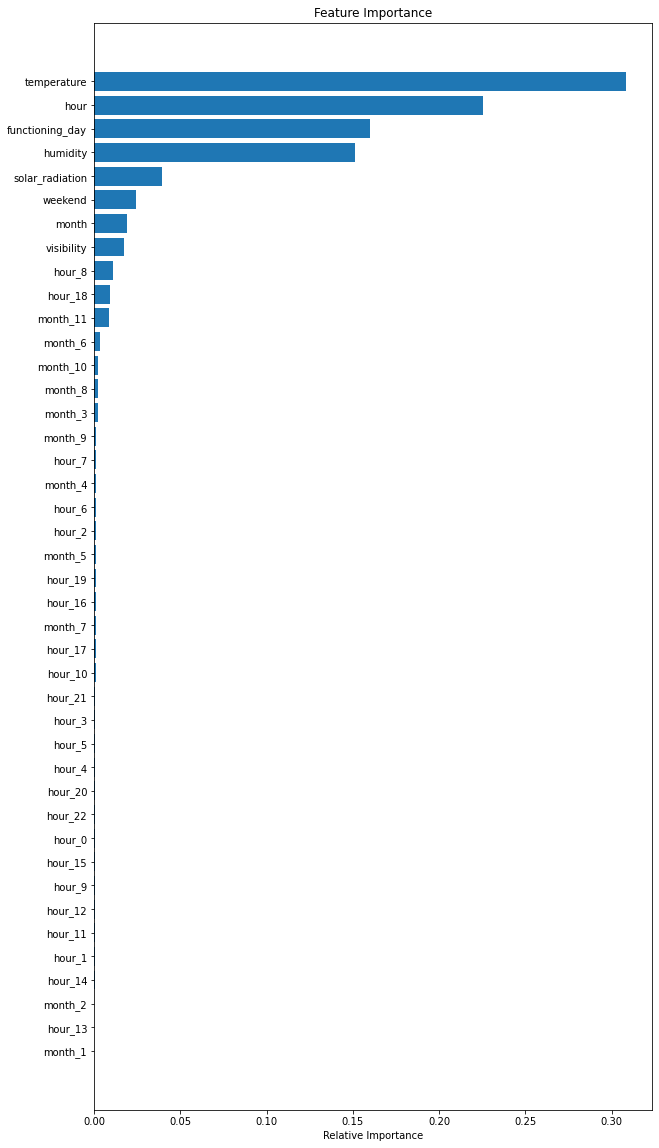

In [ ]:
# Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#### **7th Model - Gradient Boosting (Ensemble Method)**

In [ ]:
# import the packages
from sklearn.ensemble import GradientBoostingRegressor
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
# Making predictions on train and test data

y_pred_train_g = gb_model.predict(X_train)
y_pred_test_g = gb_model.predict(X_test)

##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_model.score(X_train,y_train))
# calculate MSE
MSE_gb= mean_squared_error(y_train, y_pred_train_g)
print("MSE :",MSE_gb)

# calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)

# calculate MAE
MAE_gb= mean_absolute_error(y_train, y_pred_train_g)
print("MAE :",MAE_gb)

# import the packages
from sklearn.metrics import r2_score
# calculate r2 and adjusted r2
r2_gb= r2_score(y_train, y_pred_train_g)
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.8943871545179984
MSE : 16.312532037544287
RMSE : 4.038877571497345
MAE : 2.8541015996926724
R2 : 0.8943871545179984
Adjusted R2 : 0.8923211370469951


Looks like our r2 score value is 0.894 that means our model is  able to capture most of the data variance. Lets save it in a dataframe to compare it later.

In [ ]:
# storing the test set metrics value in a dataframe to compare it later
dict1={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# import the packages
from sklearn.metrics import mean_squared_error
# calculate MSE
MSE_gb= mean_squared_error(y_test, y_pred_test_g)
print("MSE :",MSE_gb)

# calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)

# calculate MAE
MAE_gb= mean_absolute_error(y_test, y_pred_test_g)
print("MAE :",MAE_gb)

# import the packages
from sklearn.metrics import r2_score
# calculate r2 and adjusted r2
r2_gb= r2_score((y_test), (y_pred_test_g))
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 18.088279571260106
RMSE : 4.253031809340262
MAE : 3.0709811628901478
R2 : 0.8845479797851137
Adjusted R2 : 0.8822894866090423


The r2_score for the test set is 0.884. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter)

In [ ]:
# storing the test set metrics value in a dataframe to compare it later
dict2={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

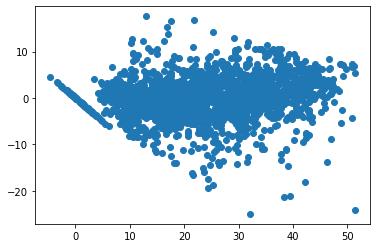

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_g),(y_test)-(y_pred_test_g))

In [ ]:
gb_model.feature_importances_

array([2.12907077e-01, 3.20070987e-01, 1.50574303e-01, 1.91370087e-03,
       3.61983615e-02, 1.83237729e-01, 2.05365286e-02, 1.88063821e-02,
       0.00000000e+00, 1.10463629e-04, 3.13943455e-04, 0.00000000e+00,
       3.41013448e-04, 4.12161397e-03, 5.51676228e-04, 2.53306152e-03,
       0.00000000e+00, 3.90493835e-03, 9.91775349e-03, 9.83257590e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.74722879e-03,
       2.17936913e-03, 6.12613324e-04, 5.73411578e-04, 1.28526788e-02,
       0.00000000e+00, 1.57327413e-03, 7.41551729e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.14569556e-02, 2.40126385e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

In [ ]:
importances = gb_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.head()

,Feature,Feature Importance
0,hour,0.21
1,temperature,0.32
2,humidity,0.15
3,visibility,0.00
4,solar_radiation,0.04


In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
1,temperature,0.32
0,hour,0.21
5,functioning_day,0.18
2,humidity,0.15
4,solar_radiation,0.04
6,month,0.02
7,weekend,0.02
27,hour_8,0.01
37,hour_18,0.01
18,month_11,0.01


In [ ]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

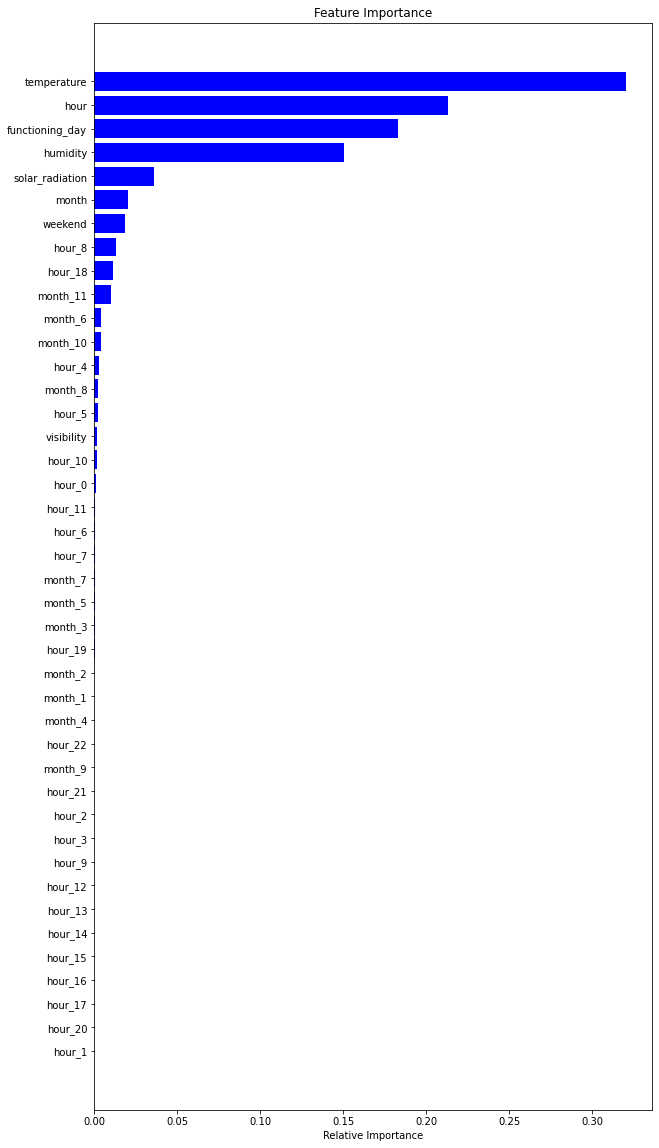

In [ ]:
# Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#### **8th Model Gradient Boosting Regressor with GridSearchCV**

##### Hyperparameter tuning

Let's try adjusting some hyperparameters to see if our model performs better before moving on to the next models.

The process of selecting the best hyperparameters for a learning algorithm is known as hyperparameter tuning. A model argument is a hyperparameter whose value is set before learning begins. Hyperparameter tuning is the key to machine learning algorithmic success.

##### Using GridSearch CV

GridSearch CV makes it easier to fit the model to the training set by looping through predefined hyperparameters. Thus, in the end, we can select the optimal hyperparameters from the list.

##### Provide the range of values for chosen hyperparameter

In [ ]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# Hyperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
param_dict

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50]}

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

gb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [ ]:
gb_grid.best_estimator_

GradientBoostingRegressor(max_depth=8, min_samples_leaf=40,
                          min_samples_split=50)

In [ ]:
gb_optimal_model = gb_grid.best_estimator_

In [ ]:
gb_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [ ]:
# Making predictions on train and test data

y_pred_train_g_g = gb_optimal_model.predict(X_train)
y_pred_g_g= gb_optimal_model.predict(X_test)

##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_optimal_model.score(X_train,y_train))
MSE_gbh= mean_squared_error(y_train, y_pred_train_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_train, y_pred_train_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score(y_train, y_pred_train_g_g)
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.9510500265382631
MSE : 7.5606144942624915
RMSE : 2.7496571594041486
MAE : 1.7595796450321235
R2 : 0.9510500265382631
Adjusted R2 : 0.950092458356897


In [ ]:
# storing the test set metrics value in a dataframe to compare it later
dict1={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
from sklearn.metrics import mean_squared_error
MSE_gbh= mean_squared_error(y_test, y_pred_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_test, y_pred_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score((y_test), (y_pred_g_g))
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_test, y_pred_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_g_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 12.23250966406451
RMSE : 3.4975004880720904
MAE : 2.2195785730538615
R2 : 0.9219235888382511
Adjusted R2 : 0.920396244046079


In [ ]:
# storing the test set metrics value in a dataframe to compare it later
dict2={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

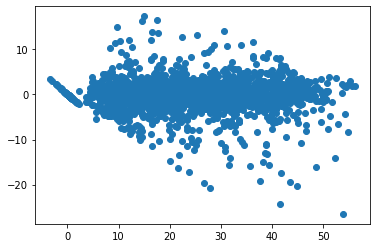

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_g_g),(y_test)-(y_pred_g_g))

In [ ]:
gb_optimal_model.feature_importances_

array([2.29429700e-01, 3.20673698e-01, 1.64171005e-01, 8.48103539e-03,
       3.73729579e-02, 1.54636015e-01, 2.04451456e-02, 1.85834996e-02,
       1.04725446e-06, 8.78372630e-05, 6.73428821e-04, 3.36342035e-04,
       4.95153707e-04, 2.37798977e-03, 8.07630555e-04, 2.13672164e-03,
       2.02488290e-04, 1.82409295e-03, 8.77718200e-03, 6.18075825e-04,
       9.61380320e-05, 9.09453617e-04, 4.70657980e-04, 6.37473130e-04,
       5.25061911e-04, 1.05814412e-03, 9.24531059e-04, 1.12714459e-02,
       1.57494186e-04, 1.02695464e-03, 4.69749633e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.34044366e-06, 0.00000000e+00,
       9.40201627e-04, 9.20451813e-03, 3.74999241e-04, 8.92946385e-06,
       4.75862744e-05, 1.64048864e-04])

In [ ]:
importances = gb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.head()

,Feature,Feature Importance
0,hour,0.23
1,temperature,0.32
2,humidity,0.16
3,visibility,0.01
4,solar_radiation,0.04


In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
1,temperature,0.32
0,hour,0.23
2,humidity,0.16
5,functioning_day,0.15
4,solar_radiation,0.04
6,month,0.02
7,weekend,0.02
3,visibility,0.01
27,hour_8,0.01
37,hour_18,0.01


In [ ]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

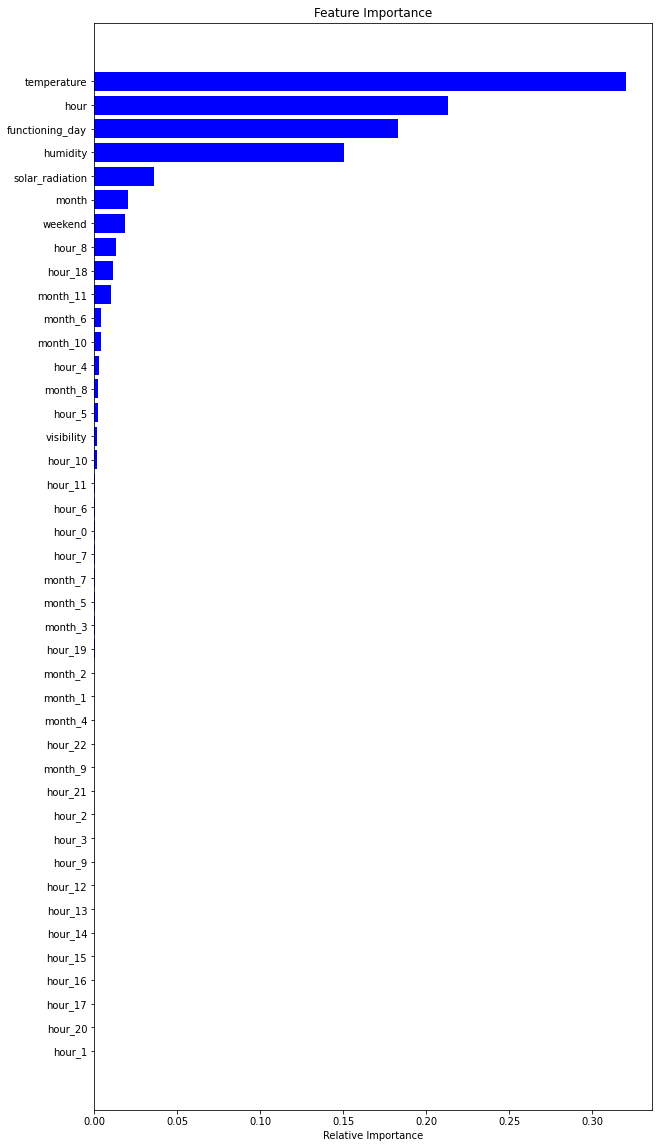

In [ ]:
# Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

## **8. Final Verdict**

#### 1. Which Evaluation metrics did you consider for a positive business impact and why?

The R square is calculated by replacing the calculated prediction with the mean by dividing the sum of the squared prediction error by the total sum of the squares. The R Square worth reaches from 0 to 1, and a higher worth shows that the forecast and genuine worth are all the more firmly adjusted.


The fit of the model to the dependent variables can be evaluated using the R square measure. On the other hand, overfitting is not taken into consideration. If there are a lot of independent variables in the regression model, it may work well with training data but fail with testing data because it is too complicated. Adjusted R Square is a new metric that penalizes additional independent variables added to the model and adjusts the metric to prevent overfitting.

Because it estimates the relationship between the movements of a dependent variable and those of an independent variable, R square is the best evaluation method for predicting the rented_bike_count. 

#### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I chose the Random Forest model because, first and foremost, I need a better prediction for the number of rented bikes, and time is not a constraint because the data is different from that of Zomato or Uber, where real-time booking must be completed more quickly. As a result, various linear models, decision trees, Random Forest, and Gradient Boost techniques were used to improve accuracy. I would like to compare their evaluation metrics, which are provided here.

In [ ]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'], axis =1)
result

Training set                                             \
                             Model    MAE     MSE   RMSE R2_score Adjusted R2   
0               Linear regression   4.630  37.500  6.120    0.760        0.75   
1                Lasso regression   6.790  83.870  9.160    0.460        0.45   
2                Ridge regression   4.632  37.499  6.124    0.757        0.75   
3          Elastic net regression   5.740  57.470  7.580    0.630        0.62   
4        Dicision tree regression   4.526  39.607  6.293    0.744        0.74   
5        Random forest regression   0.820   1.810  1.350    0.990        0.99   
6    Gradient boosting regression   2.854  16.313  4.039    0.894        0.89   
7  Gradient Boosting gridsearchcv   1.760   7.561  2.750    0.951        0.95   

                          Test set                                             
                             Model    MAE     MSE   RMSE R2_score Adjusted R2  
0               Linear regression   4.780  39.750  6.310    0.750        0.74  
1                Lasso regression   6.944  85.679  9.256    0.453        0.44  
2                Ridge regression   4.780  39.752  6.305    0.746        0.74  
3      Elastic net regression Test  5.860  58.490  7.650    0.630        0.62  
4        Dicision tree regression   4.830  45.820  6.770    0.710        0.70  
5        Random forest regression   2.170  12.240  3.500    0.920        0.92  
6    Gradient boosting regression   3.071  18.088  4.253    0.885        0.88  
7  Gradient Boosting gridsearchcv   2.220  12.233  3.498    0.922        0.92

For the following reasons, I would choose Random Forest.
* One of the best R2 scores for the Test Set (0.92) and the Training Set (0.99)
* Test RMSE and training RMSE were the lowest.
* Test MAE and Training MAE are the lowest.
* A single model that can be used on both business days and weekends.
* Lowest Overfit (the Train RMSE is more comparable to the Test RMSE).
* Lesser opportunity to prepare because of a lesser number of elements.
* Random Forest takes less time to train and test than Gradient Boosting with GridSearch CV, a good model, but Gradient Boosting with GridSearch CV takes more time to train.

#### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 7.0 MB/s 


In [ ]:
# package used to calculate Shap values
import shap 

# Create object that can calculate shap values
explainer = shap.Explainer(rf_model)

# Calculate Shap values
shap_values = explainer(X_test)

A force plot is one way to show SHAP values visually. These provide us with information comparable to that of a waterfall plot depicting the contribution of the geological features and their relationship to one another in a straight line. Assuming one worth of builds res will pack. As you can see, our starting point is the same, which is -1.94.

Individual predictions can be easily interpreted using force and waterfall plots. We need to combine the SHAP values to comprehend how our model generally makes predictions. Using a decision plot is one way to accomplish this. The code that was used to generate the decision plot for the first ten abalones is shown above.

The plot has ten lines, one for each abalone, as can be seen. They all end with their final predicted number of rings and begin with the same base value of -1.94. The SHAP value for each feature indicates the movement on the x-axis as you ascend from that feature on the y-axis. In the end, this provides the same data as a waterfall plot, with the exception that we can now see it for multiple observations.

We can already observe some trends with only ten observations. For instance, some of the lines appear to zigzag at the chart's top. The prediction for these observations is positive (SHAP) for the shucked weight and negative (SHAP) for the shell weight and whole weight. To put it another way, the prediction is affected in different ways by these features. At the point when we take a gander at plot 5 — beeswarm, we will see that this is the situation for the model overall.

An issue with this outline is that we can't utilize it to picture all the SHAP values immediately. It will become too cluttered as the number of observations increases, making it difficult to comprehend the model's operation. We can only explain the SHAP values for a small number of observations.

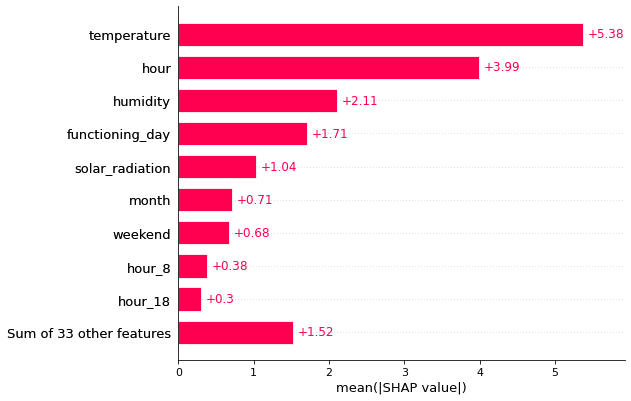

In [ ]:
#Mean SHAP
shap.plots.bar(shap_values)

A mean SHAP plot is yet another approach to aggregating the values. We find the mean of all observations' absolute SHAP values for each feature. We accept the outright qualities as we don't maintain that positive and negative qualities should balance one another. The bar graph above is what we have at the end. We can see that the feature with the largest mean SHAP, shell weight, is represented by a single bar.

Positive and negative SHAP values for features with large mean SHAP values will typically be large. To put it another way, these are the characteristics that significantly influence the predictions made by the model. This plot can be used in the same way that a feature importance plot can be used. That is, to emphasize characteristics that are crucial to a model's predictions. The fact that it reveals nothing about the nature of the relationship between the target variable and features is a problem.

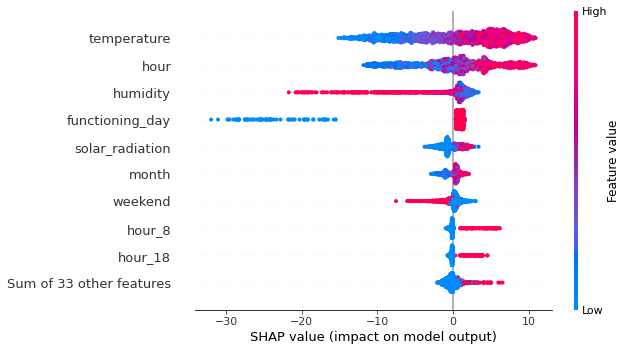

In [ ]:
# Beeswarm plot
shap.plots.beeswarm(shap_values)

The beeswarm plot is our final grouping. As found in Figure, this is a plot of all the SHAP values. The y-axis features are used to group the values. For each gathering, the shade the not entirely settled by the worth of a similar element (for example higher element values are redder). The mean SHAP values determine the order of the features.

Some of the problems from the previous plots are addressed in this one. Dissimilar to the choice plot, we can plot every one of the perceptions yet has clear translations. It can be used to emphasize important relationships, like mean SHAP. We can also begin to comprehend these relationships' nature. Take, for instance, Day_1call_duration, where you can see that the SHAP values rise in tandem with the feature value.

##**9. Summary and Conclusion**

#### **Summary**

We began our analysis by performing EDA on all of our datasets. First, we looked at and changed our dependent variable, "Rental Bike Count." After that, we looked at categorical variables and eliminated those that represented the majority of one class. We also looked at numerical variables and discovered their correlation, distribution, and connection to the dependent variable. Additionally, we hot-encoded the categorical variables and removed some numerical features that primarily had 0 values.

Following that, we examine several well-known individual models, ranging from straightforward ensemble models like Random Forest and Gradient Boost to more complex ones like the Linear Regressor and Regularization Models (Ridge and Lasso). A single, unified model for working and nonworking days was also one of the few model formulation options tested.

Linear Regression, Lasso, Ridge, Elastic net, Decision Tree, Random Forest, and XGBoost were the next eight machine learning algorithms we used. To enhance the performance of our model, we performed hyperparameter tuning.

####**Conclusion**

1. Here are some solutions to manage Bike Sharing Demand ⏬

* Create a portfolio of regular customers.
* The majority of rentals are for daily commutes to workplaces and colleges. Therefore open additional stations near these landmarks to reach their primary customers.
* While planning for extra bikes to stations the peak rental hours must be considered, i.e. 7–9 am and 5–6 pm.
* Start a new renting program for premium customers to increase business.
* Utilize the ML model to cater to demand efficiently.
* Be ready for 2 kinds of patterns in demand which are for a working day and a non- working day.
*  Maintenance activities for bikes should be done at night due to low usage of bikes during the night time. Removing some bikes from the streets at night time will not cause trouble for the customers.
* Try to get the bookings as early as possible to manage the demand.
* May start giving discounts to bookings if they book bike in advance.
* Be proactive with communication. Ask for feedback often.
* Periodically throw Offers to retain customers.
* Look at the customers facing problems with the service.
* Lean into the best customers.
* Solving Poor Network Connectivity Issues.
* Define a roadmap for new customers.
* Stay competitive.

2. We see 2 rental patterns across the day in bike rentals count - first for a Working Day where the rental count is high at peak office hours (8 am and 5 pm) and the second for a Non-working day where the rental count is more or less uniform across the day with a peak at around noon.
3. Hour of the day: Bike rental count is mostly correlated with the time of the day. As indicated above, the count reaches a high point during peak hours on a working day and is mostly uniform during the day on a non-working day.
4. Temperature: People generally prefer to bike at moderate to high temperatures. We see the highest rental counts between 32 to 36 degrees Celcius
5. Season: We see the highest number of bike rentals in the Spring (July to September) and Summer (April to June) Seasons and the lowest in the Winter (January to March) season.
6. Weather: As one would expect, we see the highest number of bike rentals on a clear day and the lowest on a snowy or rainy day
7. Humidity: With increasing humidity, we see a decrease in the bike rental count.
8. I have chosen the Random Forest model which is above all else I want better expectations for the rented_bike_count and time isn't compelling here. As a result, various linear models, decision trees, Random Forests, and Gradient Boost techniques were used to improve accuracy. I compared R2 metrics to choose a model.
9. No overfitting is seen in our model.
10. Due to less no. of data in the dataset, the training R2 score is around 99% and the test R2 score is 92%. Once we get more data we can retrain our algorithm for better performance.

#### **Way Forward**

However, this is not the ultimate end. As this data is time dependent, the values for variables like temperature, windspeed, solar radiation etc., will not always be consistent. Therefore, there will be scenarios where the model might not perform well. As Machine learning is an exponentially evolving field, we will have to be prepared for all contingencies and also keep checking our model from time to time. Therefore, having a quality knowledge and keeping pace with the ever evolving ML field would surely help one to stay a step ahead in future.

### ***Hurrah! We have successfully completed our Machine Learning Capstone Project !!!***